In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
appl_df = pd.read_csv("appl.csv")
googl_df = pd.read_csv("googl.csv")
nvda_df = pd.read_csv("nvda.csv")

In [3]:
appl_df.head(5)

,ticker,smonth,oprice,cprice,svol
0,APPL,1985-01-01,0.13,0.13,6366416000
1,APPL,1985-02-01,0.13,0.11,4733388800
2,APPL,1985-03-01,0.11,0.10,4615587200
3,APPL,1985-04-01,0.10,0.09,2868028800
4,APPL,1985-05-01,0.09,0.08,4639129600


In [4]:
appl_df.dtypes

ticker     object
smonth     object
oprice    float64
cprice    float64
svol        int64
dtype: object

In [5]:
appl_df["smonth"] = pd.to_datetime(appl_df["smonth"], errors="coerce")

In [6]:
appl_df.dtypes

ticker            object
smonth    datetime64[ns]
oprice           float64
cprice           float64
svol               int64
dtype: object

In [7]:
googl_df.head(5)

,ticker,smonth,oprice,cprice,svol
0,GOOGL,2004-08-01,2.50,2.56,2672137188
1,GOOGL,2004-09-01,2.57,3.24,4249913832
2,GOOGL,2004-10-01,3.27,4.77,10272433284
3,GOOGL,2004-11-01,4.84,4.55,11092660236
4,GOOGL,2004-12-01,4.55,4.82,5807878308


In [8]:
googl_df.dtypes

ticker     object
smonth     object
oprice    float64
cprice    float64
svol        int64
dtype: object

In [9]:
googl_df["smonth"] = pd.to_datetime(googl_df["smonth"], errors="coerce")

In [10]:
googl_df.dtypes

ticker            object
smonth    datetime64[ns]
oprice           float64
cprice           float64
svol               int64
dtype: object

In [11]:
nvda_df.head(5)

,ticker,smonth,oprice,cprice,svol
0,NVDA,1999-01-01,0.04,0.04,4284288000
1,NVDA,1999-02-01,0.04,0.05,3146592000
2,NVDA,1999-03-01,0.05,0.04,2014512000
3,NVDA,1999-04-01,0.04,0.04,1767024000
4,NVDA,1999-05-01,0.04,0.04,2482512000


In [12]:
nvda_df.dtypes

ticker     object
smonth     object
oprice    float64
cprice    float64
svol        int64
dtype: object

In [13]:
nvda_df["smonth"] = pd.to_datetime(nvda_df["smonth"], errors="coerce")

In [14]:
nvda_df.dtypes

ticker            object
smonth    datetime64[ns]
oprice           float64
cprice           float64
svol               int64
dtype: object

In [15]:
cpi_df = pd.read_csv("cpi.csv")

In [16]:
cpi_df.head

<bound method NDFrame.head of     observation_date  cpiaucsl
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
943       2025-08-01   323.364
944       2025-09-01   324.368
945       2025-10-01       NaN
946       2025-11-01   325.031
947       2025-12-01   326.030

[948 rows x 2 columns]>

In [17]:
cpi_df.dtypes

observation_date     object
cpiaucsl            float64
dtype: object

In [18]:
cpi_df["observation_date"] = pd.to_datetime(cpi_df["observation_date"], errors="coerce")

In [19]:
cpi_df.dtypes

observation_date    datetime64[ns]
cpiaucsl                   float64
dtype: object

In [20]:
cpi_df.head

<bound method NDFrame.head of     observation_date  cpiaucsl
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
943       2025-08-01   323.364
944       2025-09-01   324.368
945       2025-10-01       NaN
946       2025-11-01   325.031
947       2025-12-01   326.030

[948 rows x 2 columns]>

In [21]:
# Sort data
appl_df = appl_df.sort_values(['smonth'])
cpi_df = cpi_df.sort_values(['observation_date']) 

In [22]:
# Merge appl_df and cpi_df
appl_cpi = appl_df
appl_cpi = appl_cpi.merge(cpi_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [23]:
appl_cpi.head

<bound method NDFrame.head of     ticker     smonth  oprice  cprice        svol observation_date  cpiaucsl
0     APPL 1985-01-01    0.13    0.13  6366416000       1985-01-01   105.700
1     APPL 1985-02-01    0.13    0.11  4733388800       1985-02-01   106.300
2     APPL 1985-03-01    0.11    0.10  4615587200       1985-03-01   106.800
3     APPL 1985-04-01    0.10    0.09  2868028800       1985-04-01   107.000
4     APPL 1985-05-01    0.09    0.08  4639129600       1985-05-01   107.200
..     ...        ...     ...     ...         ...              ...       ...
489   APPL 2025-10-01  255.04  270.37  1097142200       2025-10-01       NaN
490   APPL 2025-11-01  270.42  278.85   877578200       2025-11-01   325.031
491   APPL 2025-12-01  278.01  271.86   924528800       2025-12-01   326.030
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT       NaN
493   APPL 2026-02-01  260.03  276.49   228766600              NaT       NaN

[494 rows x 7 columns]>

In [24]:
# Check result
appl_cpi[['ticker','smonth','oprice','cprice','svol','observation_date','cpiaucsl']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
0,APPL,1985-01-01,0.13,0.13,6366416000,1985-01-01,105.7
1,APPL,1985-02-01,0.13,0.11,4733388800,1985-02-01,106.3
2,APPL,1985-03-01,0.11,0.10,4615587200,1985-03-01,106.8
3,APPL,1985-04-01,0.10,0.09,2868028800,1985-04-01,107.0
4,APPL,1985-05-01,0.09,0.08,4639129600,1985-05-01,107.2


In [25]:
appl_cpi.tail(20)

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
474,APPL,2024-07-01,212.09,222.08,1153099800,2024-07-01,313.566
475,APPL,2024-08-01,224.37,229.00,1122667000,2024-08-01,314.131
476,APPL,2024-09-01,228.55,233.00,1232097700,2024-09-01,314.851
477,APPL,2024-10-01,229.52,225.91,930736000,2024-10-01,315.564
478,APPL,2024-11-01,220.97,237.33,891588300,2024-11-01,316.449
479,APPL,2024-12-01,237.27,250.42,977916100,2024-12-01,317.603
480,APPL,2025-01-01,248.93,236.00,1200176400,2025-01-01,319.086
481,APPL,2025-02-01,229.99,241.84,862272300,2025-02-01,319.775
482,APPL,2025-03-01,241.79,222.13,1115239500,2025-03-01,319.615
483,APPL,2025-04-01,219.81,212.50,1607318600,2025-04-01,320.321


In [26]:
print(appl_cpi[appl_cpi["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  cpiaucsl
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT       NaN
493   APPL 2026-02-01  260.03  276.49   228766600              NaT       NaN


In [27]:
appl_cpi.dropna(subset=['observation_date','cpiaucsl'])

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
0,APPL,1985-01-01,0.13,0.13,6366416000,1985-01-01,105.700
1,APPL,1985-02-01,0.13,0.11,4733388800,1985-02-01,106.300
2,APPL,1985-03-01,0.11,0.10,4615587200,1985-03-01,106.800
3,APPL,1985-04-01,0.10,0.09,2868028800,1985-04-01,107.000
4,APPL,1985-05-01,0.09,0.08,4639129600,1985-05-01,107.200
...,...,...,...,...,...,...,...
486,APPL,2025-07-01,206.67,207.57,1079935600,2025-07-01,322.132
487,APPL,2025-08-01,210.87,232.14,1218079100,2025-08-01,323.364
488,APPL,2025-09-01,229.25,254.63,1265536400,2025-09-01,324.368
490,APPL,2025-11-01,270.42,278.85,877578200,2025-11-01,325.031


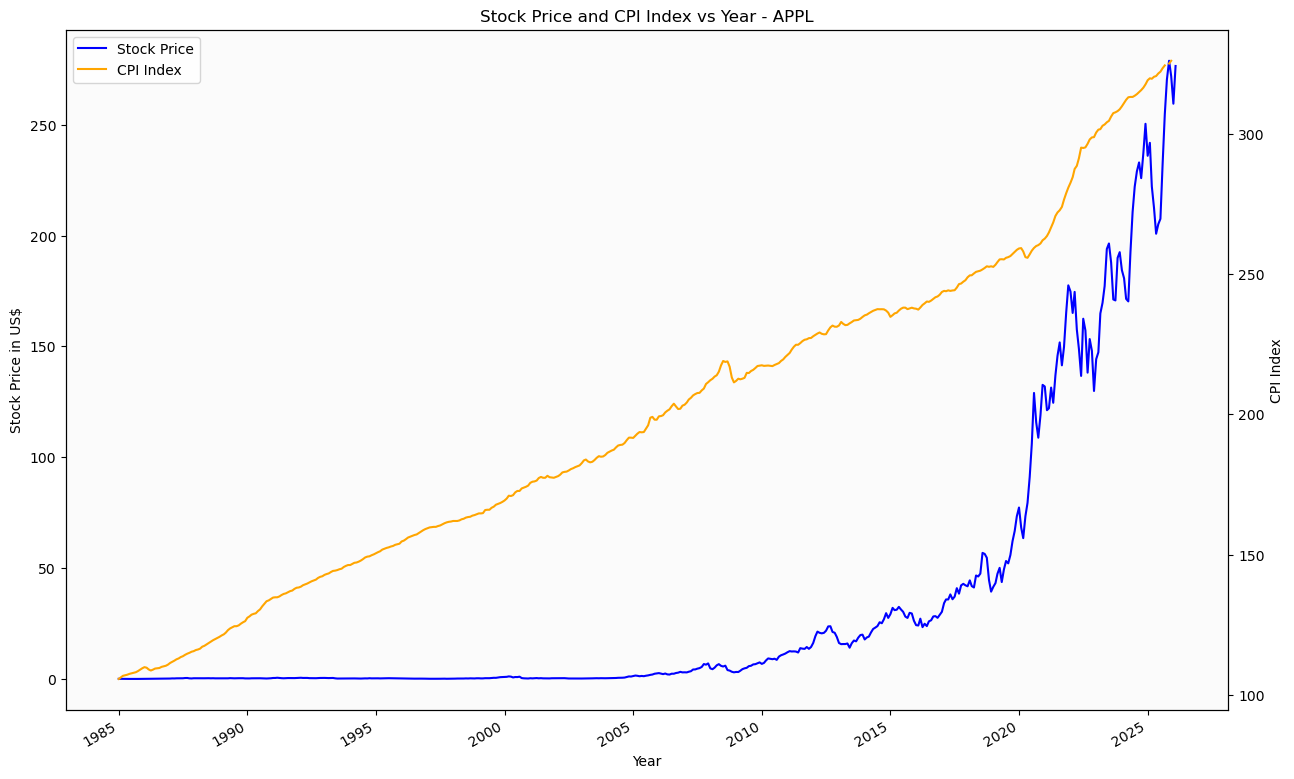

In [39]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')

left_line = ax_left.plot(appl_cpi.smonth, appl_cpi.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_cpi.observation_date, appl_cpi.cpiaucsl, label='y2', color='orange')
ax_right.set_ylabel('CPI Index')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "CPI Index"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and CPI Index vs Year - APPL")
plt.xlabel("Year")

plt.show()

In [29]:
appl_cpi_filtered = appl_cpi[(appl_cpi['smonth'] > "2015-12-31") & (appl_cpi['smonth'] < "2026-01-01")]

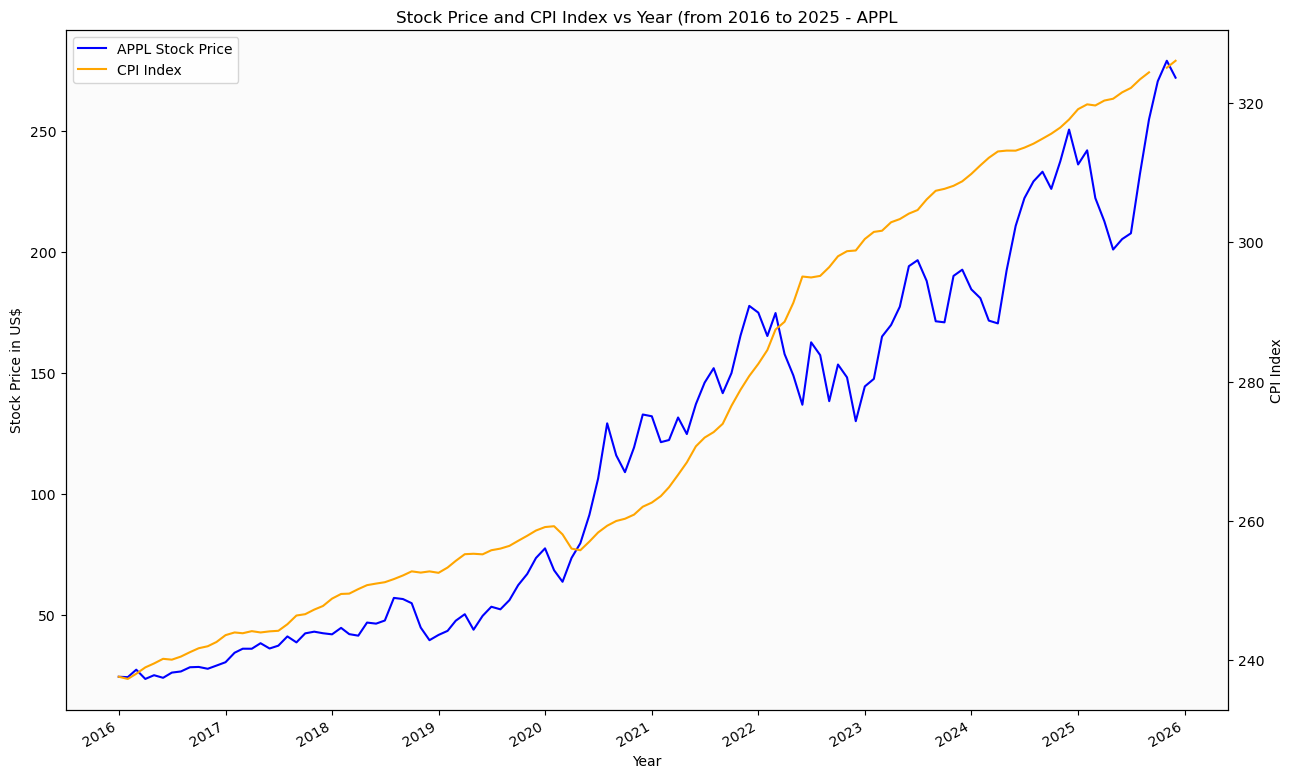

In [40]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_cpi_filtered.smonth, appl_cpi_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_cpi_filtered.observation_date, appl_cpi_filtered.cpiaucsl, label='y2', color='orange')
ax_right.set_ylabel('CPI Index')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["APPL Stock Price", "CPI Index"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and CPI Index vs Year (from 2016 to 2025 - APPL")
plt.xlabel("Year")

plt.show()

In [42]:
unemploy_df = pd.read_csv("unemployment.csv")

In [43]:
unemploy_df.head

<bound method NDFrame.head of     observation_date  unemployment_rate
0         1948-01-01                3.4
1         1948-02-01                3.8
2         1948-03-01                4.0
3         1948-04-01                3.9
4         1948-05-01                3.5
..               ...                ...
931       2025-08-01                4.3
932       2025-09-01                4.4
933       2025-10-01                NaN
934       2025-11-01                4.5
935       2025-12-01                4.4

[936 rows x 2 columns]>

In [44]:
unemploy_df.dtypes

observation_date      object
unemployment_rate    float64
dtype: object

In [45]:
unemploy_df["observation_date"] = pd.to_datetime(unemploy_df["observation_date"], errors="coerce")

In [46]:
unemploy_df.dtypes

observation_date     datetime64[ns]
unemployment_rate           float64
dtype: object

In [47]:
# Sort data
appl_df = appl_df.sort_values(['smonth'])
unemploy_df = unemploy_df.sort_values(['observation_date']) 

In [48]:
# Merge appl_df and unemploy_df
appl_unemploy = appl_df
appl_unemploy = appl_unemploy.merge(unemploy_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [49]:
appl_unemploy.head

<bound method NDFrame.head of     ticker     smonth  oprice  cprice        svol observation_date  \
0     APPL 1985-01-01    0.13    0.13  6366416000       1985-01-01   
1     APPL 1985-02-01    0.13    0.11  4733388800       1985-02-01   
2     APPL 1985-03-01    0.11    0.10  4615587200       1985-03-01   
3     APPL 1985-04-01    0.10    0.09  2868028800       1985-04-01   
4     APPL 1985-05-01    0.09    0.08  4639129600       1985-05-01   
..     ...        ...     ...     ...         ...              ...   
489   APPL 2025-10-01  255.04  270.37  1097142200       2025-10-01   
490   APPL 2025-11-01  270.42  278.85   877578200       2025-11-01   
491   APPL 2025-12-01  278.01  271.86   924528800       2025-12-01   
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT   
493   APPL 2026-02-01  260.03  276.49   228766600              NaT   

     unemployment_rate  
0                  7.3  
1                  7.2  
2                  7.2  
3                  7.3  
4   

In [50]:
print(appl_unemploy[appl_unemploy["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  \
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT   
493   APPL 2026-02-01  260.03  276.49   228766600              NaT   

     unemployment_rate  
492                NaN  
493                NaN  


In [51]:
appl_unemploy.dropna(subset=['observation_date','unemployment_rate'])

,ticker,smonth,oprice,cprice,svol,observation_date,unemployment_rate
0,APPL,1985-01-01,0.13,0.13,6366416000,1985-01-01,7.3
1,APPL,1985-02-01,0.13,0.11,4733388800,1985-02-01,7.2
2,APPL,1985-03-01,0.11,0.10,4615587200,1985-03-01,7.2
3,APPL,1985-04-01,0.10,0.09,2868028800,1985-04-01,7.3
4,APPL,1985-05-01,0.09,0.08,4639129600,1985-05-01,7.2
...,...,...,...,...,...,...,...
486,APPL,2025-07-01,206.67,207.57,1079935600,2025-07-01,4.3
487,APPL,2025-08-01,210.87,232.14,1218079100,2025-08-01,4.3
488,APPL,2025-09-01,229.25,254.63,1265536400,2025-09-01,4.4
490,APPL,2025-11-01,270.42,278.85,877578200,2025-11-01,4.5


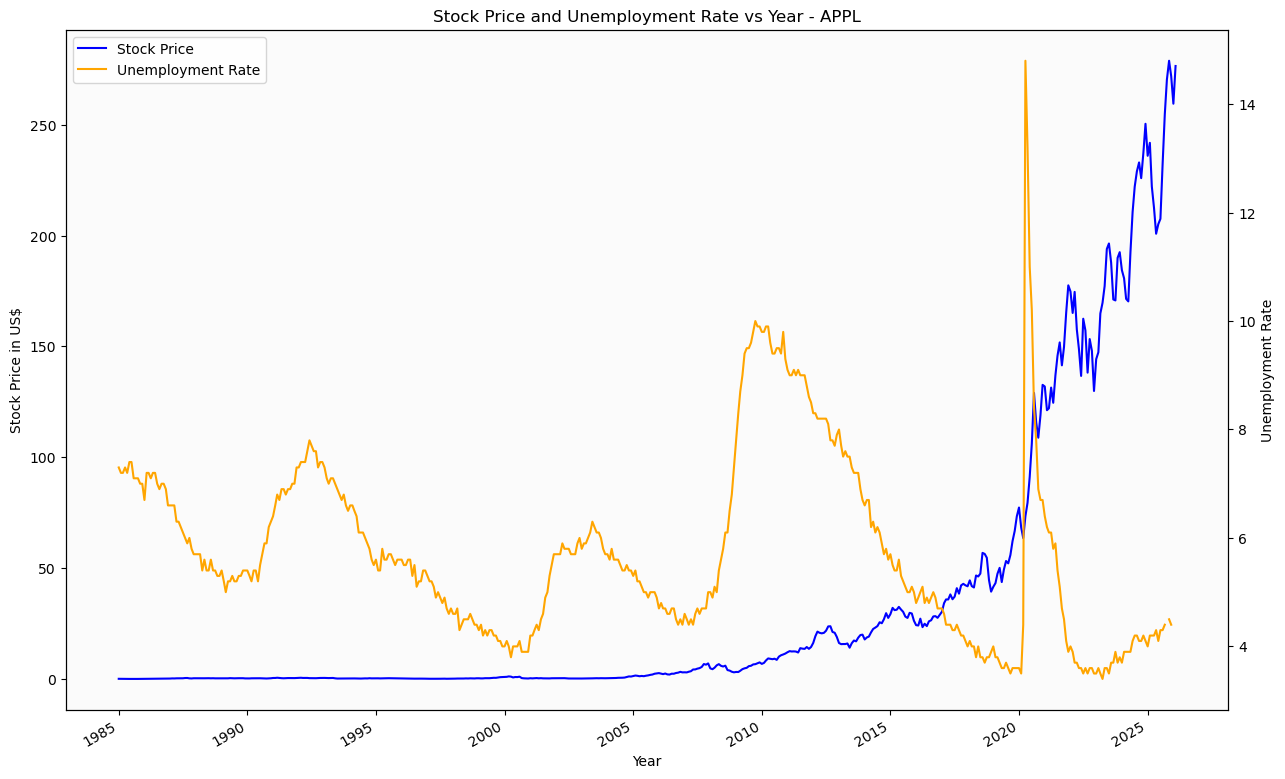

In [52]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_unemploy.smonth, appl_unemploy.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_unemploy.observation_date, appl_unemploy.unemployment_rate, label='y2', color='orange')
ax_right.set_ylabel('Unemployment Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "Unemployment Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Unemployment Rate vs Year - APPL")
plt.xlabel("Year")

plt.show()

In [53]:
appl_unemploy_filtered = appl_unemploy[(appl_unemploy['smonth'] > "2015-12-31") & (appl_unemploy['smonth'] < "2026-01-01")]

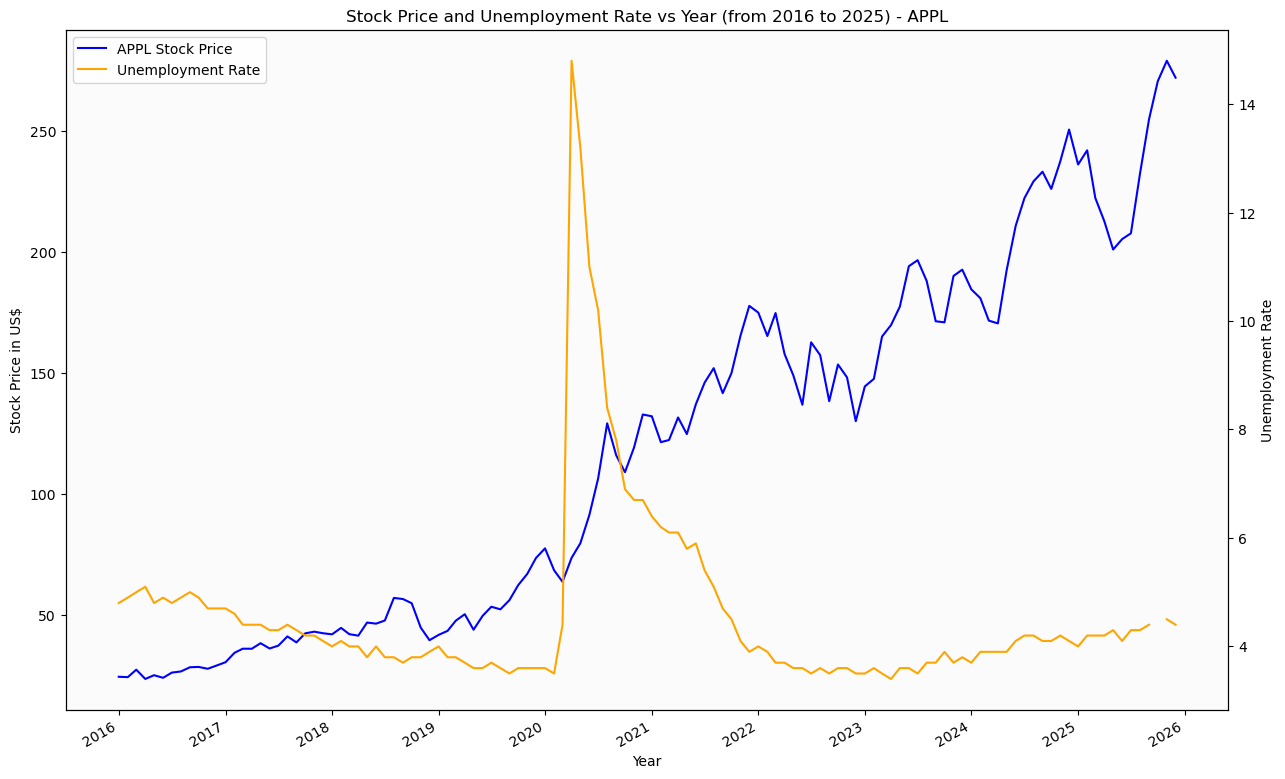

In [56]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_unemploy_filtered.smonth, appl_unemploy_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_unemploy_filtered.observation_date, appl_unemploy_filtered.unemployment_rate, label='y2', color='orange')
ax_right.set_ylabel('Unemployment Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["APPL Stock Price", "Unemployment Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Unemployment Rate vs Year (from 2016 to 2025) - APPL")
plt.xlabel("Year")

plt.show()

In [57]:
inflation_df = pd.read_csv("inflation.csv")

In [58]:
inflation_df.head

<bound method NDFrame.head of     observation_date  inflation_rate
0         2016-01-01             1.4
1         2016-02-01             1.0
2         2016-03-01             0.9
3         2016-04-01             1.1
4         2016-05-01             1.0
..               ...             ...
115       2025-08-01             2.9
116       2025-09-01             3.0
117       2025-10-01             NaN
118       2025-11-01             2.7
119       2025-12-01             2.7

[120 rows x 2 columns]>

In [59]:
inflation_df.dtypes

observation_date     object
inflation_rate      float64
dtype: object

In [60]:
inflation_df["observation_date"] = pd.to_datetime(inflation_df["observation_date"], errors="coerce")

In [61]:
inflation_df.dtypes

observation_date    datetime64[ns]
inflation_rate             float64
dtype: object

In [62]:
# Sort data
appl_df = appl_df.sort_values(['smonth'])
inflation_df = inflation_df.sort_values(['observation_date']) 

In [63]:
# Merge appl_df and unemploy_df
appl_inflation = appl_df
appl_inflation = appl_inflation.merge(inflation_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [64]:
appl_inflation.head

<bound method NDFrame.head of     ticker     smonth  oprice  cprice        svol observation_date  \
0     APPL 1985-01-01    0.13    0.13  6366416000              NaT   
1     APPL 1985-02-01    0.13    0.11  4733388800              NaT   
2     APPL 1985-03-01    0.11    0.10  4615587200              NaT   
3     APPL 1985-04-01    0.10    0.09  2868028800              NaT   
4     APPL 1985-05-01    0.09    0.08  4639129600              NaT   
..     ...        ...     ...     ...         ...              ...   
489   APPL 2025-10-01  255.04  270.37  1097142200       2025-10-01   
490   APPL 2025-11-01  270.42  278.85   877578200       2025-11-01   
491   APPL 2025-12-01  278.01  271.86   924528800       2025-12-01   
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT   
493   APPL 2026-02-01  260.03  276.49   228766600              NaT   

     inflation_rate  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [65]:
appl_inflation[['svol','observation_date','inflation_rate']].dropna().head()

,svol,observation_date,inflation_rate
372,5087392000,2016-01-01,1.4
373,3243450400,2016-02-01,1.0
374,2984198400,2016-03-01,0.9
375,3489534800,2016-04-01,1.1
376,3602686000,2016-05-01,1.0


In [66]:
print(appl_inflation[appl_inflation["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  \
0     APPL 1985-01-01    0.13    0.13  6366416000              NaT   
1     APPL 1985-02-01    0.13    0.11  4733388800              NaT   
2     APPL 1985-03-01    0.11    0.10  4615587200              NaT   
3     APPL 1985-04-01    0.10    0.09  2868028800              NaT   
4     APPL 1985-05-01    0.09    0.08  4639129600              NaT   
..     ...        ...     ...     ...         ...              ...   
369   APPL 2015-10-01   27.27   29.88  4450048400              NaT   
370   APPL 2015-11-01   30.20   29.58  3002562400              NaT   
371   APPL 2015-12-01   29.69   26.32  3687660800              NaT   
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT   
493   APPL 2026-02-01  260.03  276.49   228766600              NaT   

     inflation_rate  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
369  

In [67]:
appl_inflation.dropna(subset=['cprice','observation_date','inflation_rate'])

,ticker,smonth,oprice,cprice,svol,observation_date,inflation_rate
372,APPL,2016-01-01,25.65,24.33,5087392000,2016-01-01,1.4
373,APPL,2016-02-01,24.12,24.17,3243450400,2016-02-01,1.0
374,APPL,2016-03-01,24.41,27.25,2984198400,2016-03-01,0.9
375,APPL,2016-04-01,27.19,23.43,3489534800,2016-04-01,1.1
376,APPL,2016-05-01,23.49,24.97,3602686000,2016-05-01,1.0
...,...,...,...,...,...,...,...
486,APPL,2025-07-01,206.67,207.57,1079935600,2025-07-01,2.7
487,APPL,2025-08-01,210.87,232.14,1218079100,2025-08-01,2.9
488,APPL,2025-09-01,229.25,254.63,1265536400,2025-09-01,3.0
490,APPL,2025-11-01,270.42,278.85,877578200,2025-11-01,2.7


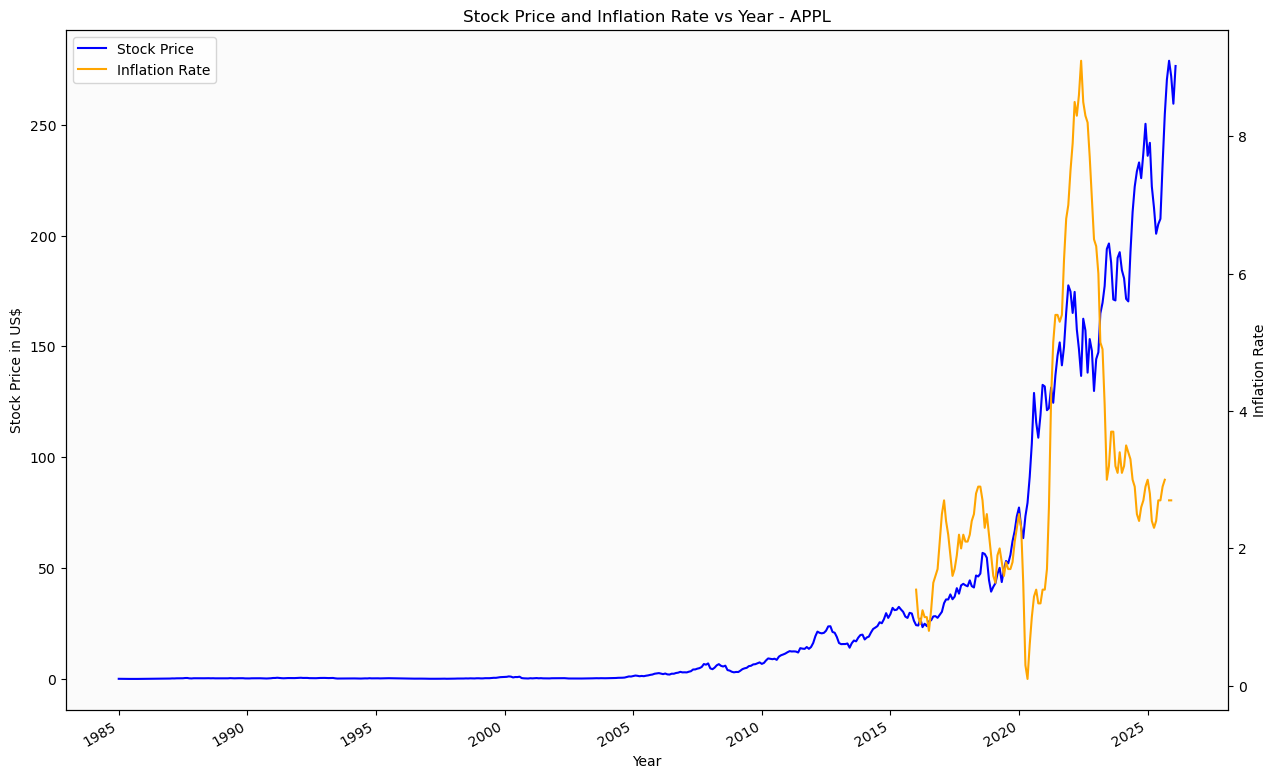

In [69]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_inflation.smonth, appl_inflation.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_inflation.observation_date, appl_inflation.inflation_rate, label='y2', color='orange')
ax_right.set_ylabel('Inflation Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "Inflation Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Inflation Rate vs Year - APPL")
plt.xlabel("Year")

plt.show()

In [70]:
appl_inflation_filtered = appl_inflation[(appl_inflation['smonth'] > "2015-12-31") & (appl_inflation['smonth'] < "2026-01-01")]

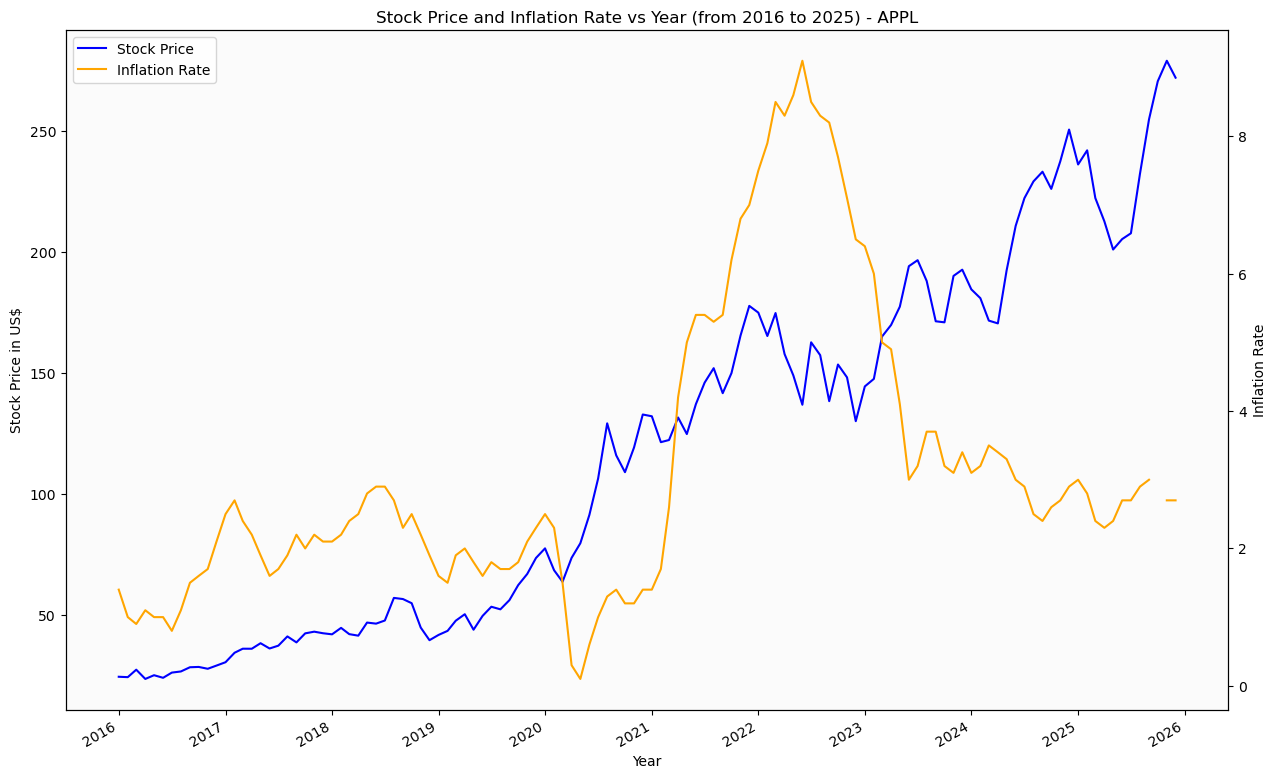

In [73]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_inflation_filtered.smonth, appl_inflation_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_inflation_filtered.observation_date, appl_inflation_filtered.inflation_rate, label='y2', color='orange')
ax_right.set_ylabel('Inflation Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "Inflation Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Inflation Rate vs Year (from 2016 to 2025) - APPL")
plt.xlabel("Year")

plt.show()

In [74]:
interest_df = pd.read_csv("interest.csv")

In [75]:
interest_df.head

<bound method NDFrame.head of      obser_date  interest
0    1980-01-01     13.82
1    1980-02-01     14.13
2    1980-03-01     17.19
3    1980-04-01     17.61
4    1980-05-01     10.98
..          ...       ...
548  2025-09-01      4.22
549  2025-10-01      4.09
550  2025-11-01      3.88
551  2025-12-01      3.72
552  2026-01-01      3.64

[553 rows x 2 columns]>

In [76]:
interest_df.dtypes

obser_date     object
interest      float64
dtype: object

In [77]:
interest_df["obser_date"] = pd.to_datetime(interest_df["obser_date"], errors="coerce")

In [78]:
interest_df.dtypes

obser_date    datetime64[ns]
interest             float64
dtype: object

In [79]:
# Merge appl_df and cpi_df
appl_interest = appl_df
appl_interest = appl_interest.merge(interest_df, left_on=['smonth'], right_on=['obser_date'], how='left')


In [80]:
# Check result
appl_interest[['ticker','smonth','oprice','cprice','svol','obser_date','interest']].dropna().head()

,ticker,smonth,oprice,cprice,svol,obser_date,interest
0,APPL,1985-01-01,0.13,0.13,6366416000,1985-01-01,8.35
1,APPL,1985-02-01,0.13,0.11,4733388800,1985-02-01,8.50
2,APPL,1985-03-01,0.11,0.10,4615587200,1985-03-01,8.58
3,APPL,1985-04-01,0.10,0.09,2868028800,1985-04-01,8.27
4,APPL,1985-05-01,0.09,0.08,4639129600,1985-05-01,7.97


In [81]:
print(appl_interest[appl_interest["obser_date"].isnull()])

    ticker     smonth  oprice  cprice       svol obser_date  interest
493   APPL 2026-02-01  260.03  276.49  228766600        NaT       NaN


In [82]:
appl_interest.dropna(subset=['obser_date','interest'])

,ticker,smonth,oprice,cprice,svol,obser_date,interest
0,APPL,1985-01-01,0.13,0.13,6366416000,1985-01-01,8.35
1,APPL,1985-02-01,0.13,0.11,4733388800,1985-02-01,8.50
2,APPL,1985-03-01,0.11,0.10,4615587200,1985-03-01,8.58
3,APPL,1985-04-01,0.10,0.09,2868028800,1985-04-01,8.27
4,APPL,1985-05-01,0.09,0.08,4639129600,1985-05-01,7.97
...,...,...,...,...,...,...,...
488,APPL,2025-09-01,229.25,254.63,1265536400,2025-09-01,4.22
489,APPL,2025-10-01,255.04,270.37,1097142200,2025-10-01,4.09
490,APPL,2025-11-01,270.42,278.85,877578200,2025-11-01,3.88
491,APPL,2025-12-01,278.01,271.86,924528800,2025-12-01,3.72


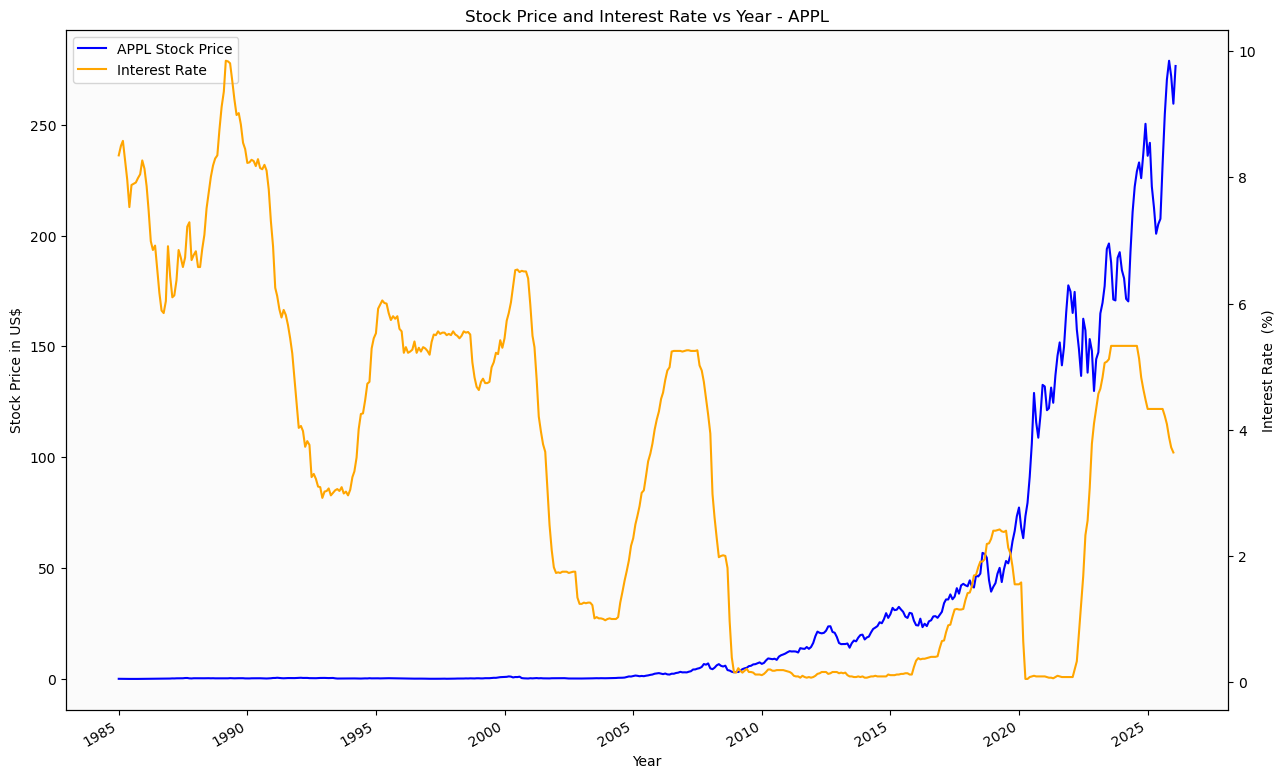

In [84]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_interest.smonth, appl_interest.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_interest.obser_date, appl_interest.interest, label='y2', color='orange')
ax_right.set_ylabel('Interest Rate  (%)')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["APPL Stock Price", "Interest Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Interest Rate vs Year - APPL")
plt.xlabel("Year")

plt.show()

In [85]:
appl_interest_filtered = appl_interest[(appl_interest['smonth'] > "2015-12-31") & (appl_interest['smonth'] < "2026-01-01")]

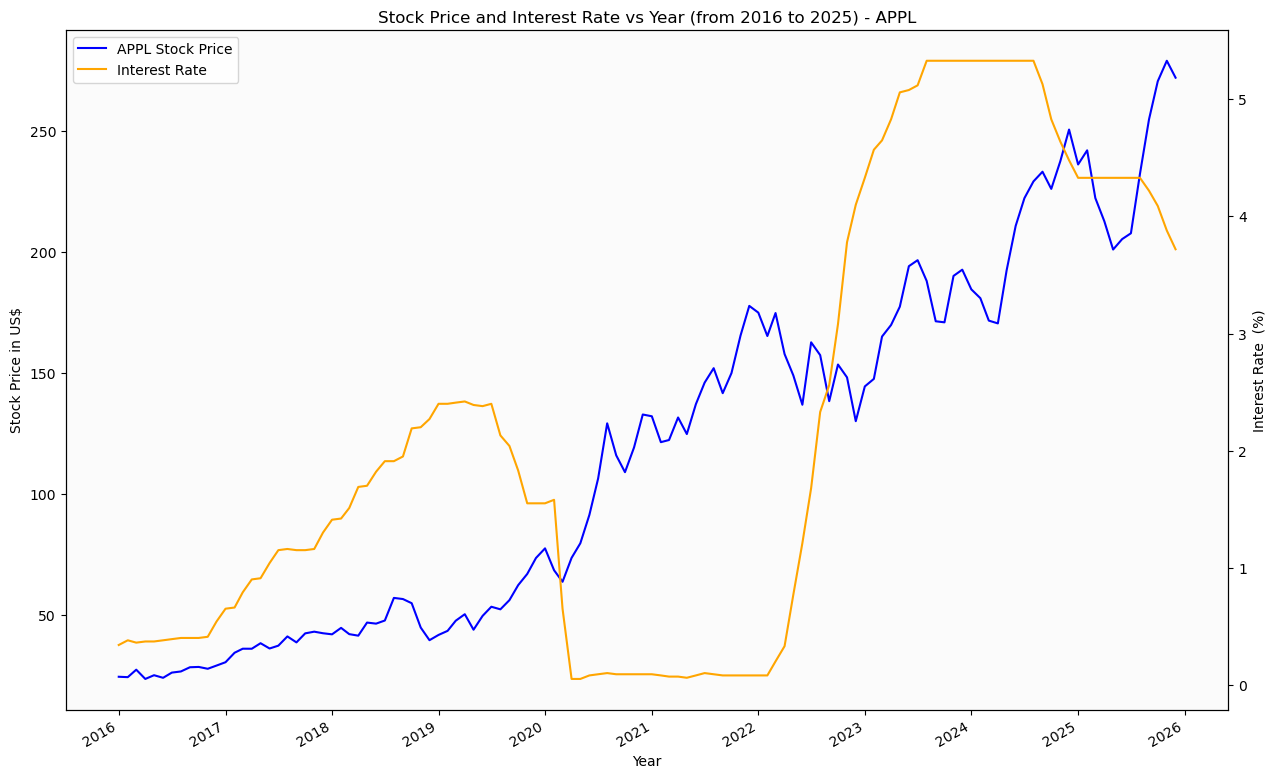

In [88]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_interest_filtered.smonth, appl_interest_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_interest_filtered.obser_date, appl_interest_filtered.interest, label='y2', color='orange')
ax_right.set_ylabel('Interest Rate  (%)')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["APPL Stock Price", "Interest Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Interest Rate vs Year (from 2016 to 2025) - APPL")
plt.xlabel("Year")

plt.show()

In [91]:
gdp_df = pd.read_csv("gdp.csv")

In [92]:
gdp_df.head

<bound method NDFrame.head of    observation_date  gdp_growth
0        2021-10-01         7.0
1        2022-01-01        -1.0
2        2022-04-01         0.6
3        2022-07-01         2.9
4        2022-10-01         2.8
5        2023-01-01         2.9
6        2023-04-01         2.5
7        2023-07-01         4.7
8        2023-10-01         3.4
9        2024-01-01         0.8
10       2024-04-01         3.6
11       2024-07-01         3.3
12       2024-10-01         1.9
13       2025-01-01        -0.6
14       2025-04-01         3.8
15       2025-07-01         4.3>

In [93]:
gdp_df.dtypes

observation_date     object
gdp_growth          float64
dtype: object

In [94]:
gdp_df["observation_date"] = pd.to_datetime(gdp_df["observation_date"], errors="coerce")

In [95]:
gdp_df.dtypes

observation_date    datetime64[ns]
gdp_growth                 float64
dtype: object

In [96]:
# Sort data
appl_df = appl_df.sort_values(['smonth'])
gdp_df = gdp_df.sort_values(['observation_date']) 

In [97]:
appl_gdp = appl_df
appl_gdp = appl_gdp.merge(gdp_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [98]:
appl_gdp.head

<bound method NDFrame.head of     ticker     smonth  oprice  cprice        svol observation_date  gdp_growth
0     APPL 1985-01-01    0.13    0.13  6366416000              NaT         NaN
1     APPL 1985-02-01    0.13    0.11  4733388800              NaT         NaN
2     APPL 1985-03-01    0.11    0.10  4615587200              NaT         NaN
3     APPL 1985-04-01    0.10    0.09  2868028800              NaT         NaN
4     APPL 1985-05-01    0.09    0.08  4639129600              NaT         NaN
..     ...        ...     ...     ...         ...              ...         ...
489   APPL 2025-10-01  255.04  270.37  1097142200              NaT         NaN
490   APPL 2025-11-01  270.42  278.85   877578200              NaT         NaN
491   APPL 2025-12-01  278.01  271.86   924528800              NaT         NaN
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT         NaN
493   APPL 2026-02-01  260.03  276.49   228766600              NaT         NaN

[494 rows x 7 columns

In [99]:
print(appl_gdp[appl_gdp["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  gdp_growth
0     APPL 1985-01-01    0.13    0.13  6366416000              NaT         NaN
1     APPL 1985-02-01    0.13    0.11  4733388800              NaT         NaN
2     APPL 1985-03-01    0.11    0.10  4615587200              NaT         NaN
3     APPL 1985-04-01    0.10    0.09  2868028800              NaT         NaN
4     APPL 1985-05-01    0.09    0.08  4639129600              NaT         NaN
..     ...        ...     ...     ...         ...              ...         ...
489   APPL 2025-10-01  255.04  270.37  1097142200              NaT         NaN
490   APPL 2025-11-01  270.42  278.85   877578200              NaT         NaN
491   APPL 2025-12-01  278.01  271.86   924528800              NaT         NaN
492   APPL 2026-01-01  272.26  259.48  1040017300              NaT         NaN
493   APPL 2026-02-01  260.03  276.49   228766600              NaT         NaN

[478 rows x 7 columns]


In [100]:
appl_gdp.dropna(subset=['observation_date','gdp_growth'])

,ticker,smonth,oprice,cprice,svol,observation_date,gdp_growth
441,APPL,2021-10-01,141.90,149.80,1565079200,2021-10-01,7.0
444,APPL,2022-01-01,177.83,174.78,2108446000,2022-01-01,-1.0
447,APPL,2022-04-01,174.03,157.65,1687795600,2022-04-01,0.6
450,APPL,2022-07-01,136.04,162.51,1447125400,2022-07-01,2.9
453,APPL,2022-10-01,138.21,153.34,1868139700,2022-10-01,2.8
456,APPL,2023-01-01,130.28,144.29,1443652500,2023-01-01,2.9
459,APPL,2023-04-01,164.27,169.68,969776400,2023-04-01,2.5
462,APPL,2023-07-01,193.78,196.45,996114000,2023-07-01,4.7
465,APPL,2023-10-01,171.22,170.77,1172816900,2023-10-01,3.4
468,APPL,2024-01-01,187.15,184.40,1187490800,2024-01-01,0.8


In [101]:
appl_gdp_modified = appl_gdp.dropna(subset=['observation_date','gdp_growth'])

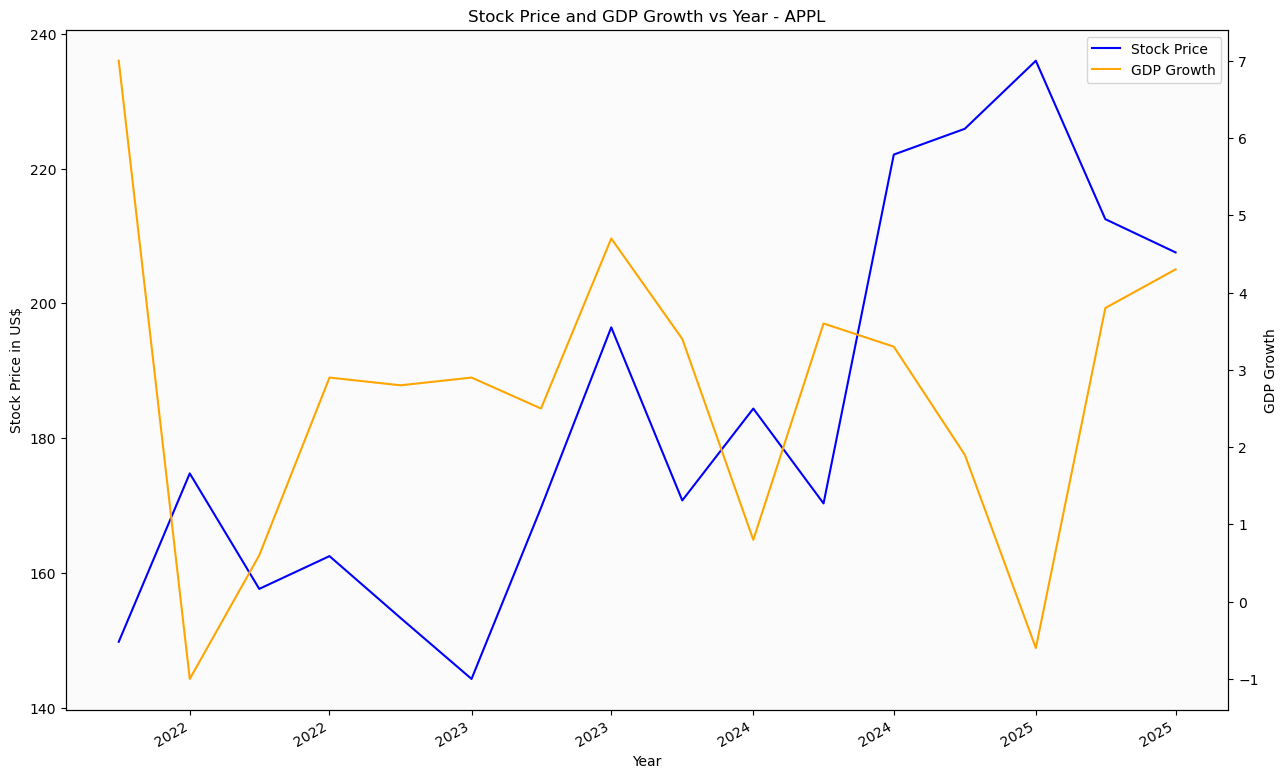

In [110]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#FBFBFB')
left_line = ax_left.plot(appl_gdp_modified.smonth, appl_gdp_modified.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(appl_gdp_modified.observation_date, appl_gdp_modified.gdp_growth, label='y2', color='orange')
ax_right.set_ylabel('GDP Growth')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "GDP Growth"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and GDP Growth vs Year - APPL")
plt.xlabel("Year")

plt.show()

In [111]:
# Sort data
googl_df = googl_df.sort_values(['smonth'])
cpi_df = cpi_df.sort_values(['observation_date']) 

In [112]:
# Merge appl_df and cpi_df
googl_cpi = googl_df
googl_cpi = googl_cpi.merge(cpi_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [113]:
# Check result
googl_cpi[['ticker','smonth','oprice','cprice','svol','observation_date','cpiaucsl']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
0,GOOGL,2004-08-01,2.50,2.56,2672137188,2004-08-01,189.2
1,GOOGL,2004-09-01,2.57,3.24,4249913832,2004-09-01,189.8
2,GOOGL,2004-10-01,3.27,4.77,10272433284,2004-10-01,190.8
3,GOOGL,2004-11-01,4.84,4.55,11092660236,2004-11-01,191.7
4,GOOGL,2004-12-01,4.55,4.82,5807878308,2004-12-01,191.7


In [114]:
print(googl_cpi[googl_cpi["observation_date"].isnull()])

    ticker     smonth  oprice  cprice       svol observation_date  cpiaucsl
257  GOOGL 2026-01-01  316.90  338.00  621586400              NaT       NaN
258  GOOGL 2026-02-01  336.22  333.04  138623500              NaT       NaN


In [115]:
googl_cpi.dropna(subset=['observation_date','cpiaucsl'])

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
0,GOOGL,2004-08-01,2.50,2.56,2672137188,2004-08-01,189.200
1,GOOGL,2004-09-01,2.57,3.24,4249913832,2004-09-01,189.800
2,GOOGL,2004-10-01,3.27,4.77,10272433284,2004-10-01,190.800
3,GOOGL,2004-11-01,4.84,4.55,11092660236,2004-11-01,191.700
4,GOOGL,2004-12-01,4.55,4.82,5807878308,2004-12-01,191.700
...,...,...,...,...,...,...,...
251,GOOGL,2025-07-01,175.74,191.90,860114400,2025-07-01,322.132
252,GOOGL,2025-08-01,189.03,212.91,617570900,2025-08-01,323.364
253,GOOGL,2025-09-01,208.44,243.10,829465500,2025-09-01,324.368
255,GOOGL,2025-11-01,282.18,320.18,855278300,2025-11-01,325.031


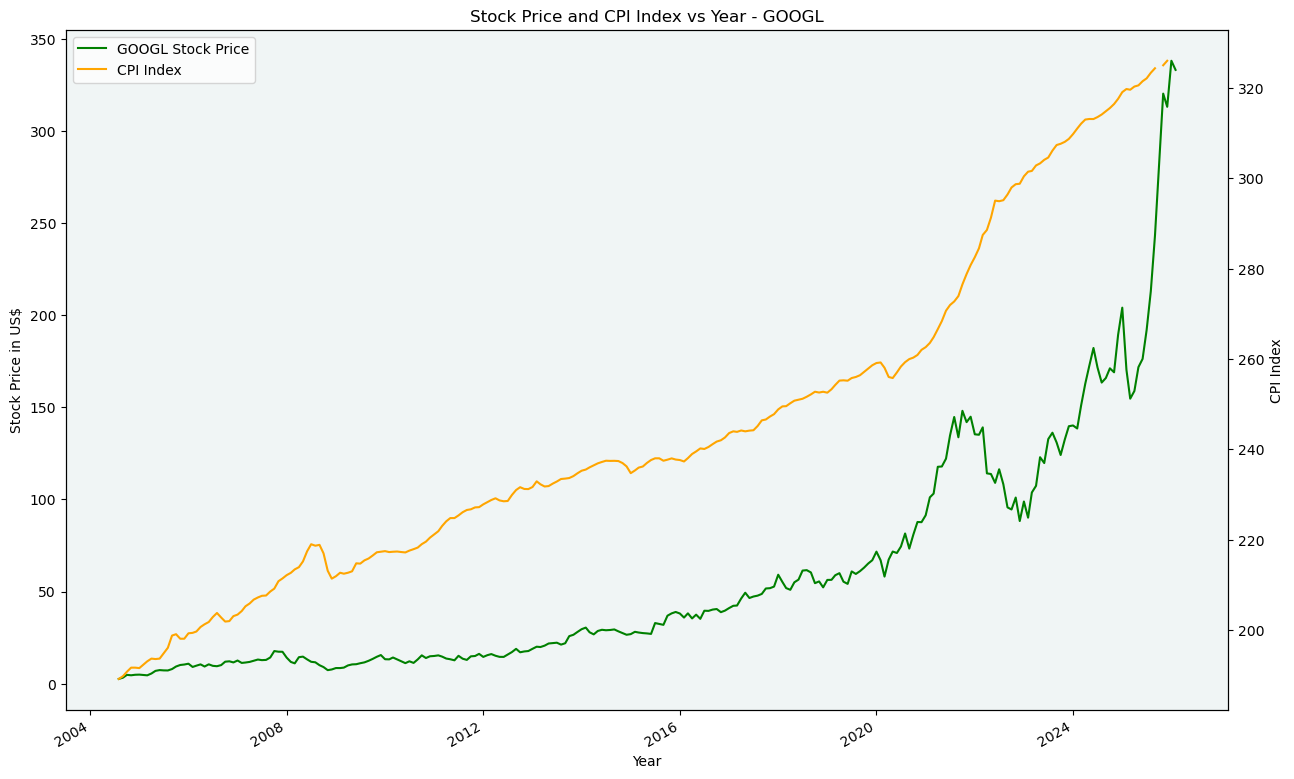

In [120]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_cpi.smonth, googl_cpi.cprice, label='y1', color='green')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_cpi.observation_date, googl_cpi.cpiaucsl, label='y2', color='orange')
ax_right.set_ylabel('CPI Index')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "CPI Index"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and CPI Index vs Year - GOOGL")
plt.xlabel("Year")

plt.show()

In [121]:
googl_cpi_filtered = googl_cpi[(googl_cpi['smonth'] > "2015-12-31") & (googl_cpi['smonth'] < "2026-01-01")]

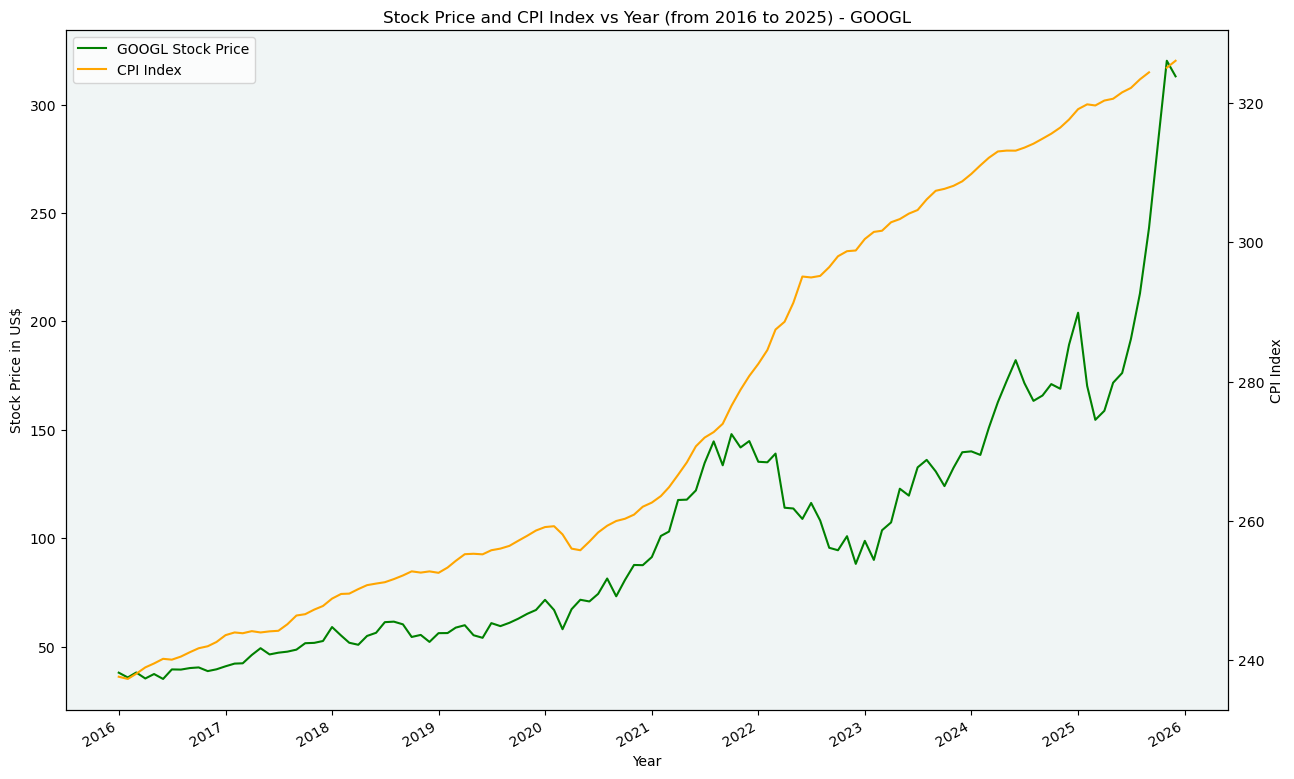

In [124]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_cpi_filtered.smonth, googl_cpi_filtered.cprice, label='y1', color='green')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_cpi_filtered.observation_date, googl_cpi_filtered.cpiaucsl, label='y2', color='orange')
ax_right.set_ylabel('CPI Index')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "CPI Index"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and CPI Index vs Year (from 2016 to 2025) - GOOGL")
plt.xlabel("Year")

plt.show()

In [125]:
unemploy_df = pd.read_csv("unemployment.csv")

In [126]:
unemploy_df.head

<bound method NDFrame.head of     observation_date  unemployment_rate
0         1948-01-01                3.4
1         1948-02-01                3.8
2         1948-03-01                4.0
3         1948-04-01                3.9
4         1948-05-01                3.5
..               ...                ...
931       2025-08-01                4.3
932       2025-09-01                4.4
933       2025-10-01                NaN
934       2025-11-01                4.5
935       2025-12-01                4.4

[936 rows x 2 columns]>

In [127]:
unemploy_df.dtypes

observation_date      object
unemployment_rate    float64
dtype: object

In [128]:
unemploy_df["observation_date"] = pd.to_datetime(unemploy_df["observation_date"], errors="coerce")

In [129]:
unemploy_df.dtypes

observation_date     datetime64[ns]
unemployment_rate           float64
dtype: object

In [130]:
# Sort data
googl_df = googl_df.sort_values(['smonth'])
unemploy_df = unemploy_df.sort_values(['observation_date']) 

In [131]:
# Merge appl_df and cpi_df
googl_unemploy = googl_df
googl_unemploy = googl_unemploy.merge(unemploy_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [132]:
googl_unemploy.head

<bound method NDFrame.head of     ticker     smonth  oprice  cprice         svol observation_date  \
0    GOOGL 2004-08-01    2.50    2.56   2672137188       2004-08-01   
1    GOOGL 2004-09-01    2.57    3.24   4249913832       2004-09-01   
2    GOOGL 2004-10-01    3.27    4.77  10272433284       2004-10-01   
3    GOOGL 2004-11-01    4.84    4.55  11092660236       2004-11-01   
4    GOOGL 2004-12-01    4.55    4.82   5807878308       2004-12-01   
..     ...        ...     ...     ...          ...              ...   
254  GOOGL 2025-10-01  240.75  281.19    729575900       2025-10-01   
255  GOOGL 2025-11-01  282.18  320.18    855278300       2025-11-01   
256  GOOGL 2025-12-01  317.70  313.00    678208700       2025-12-01   
257  GOOGL 2026-01-01  316.90  338.00    621586400              NaT   
258  GOOGL 2026-02-01  336.22  333.04    138623500              NaT   

     unemployment_rate  
0                  5.4  
1                  5.4  
2                  5.5  
3                

In [133]:
# Check result
googl_unemploy[['ticker','smonth','oprice','cprice','svol','observation_date','unemployment_rate']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,unemployment_rate
0,GOOGL,2004-08-01,2.50,2.56,2672137188,2004-08-01,5.4
1,GOOGL,2004-09-01,2.57,3.24,4249913832,2004-09-01,5.4
2,GOOGL,2004-10-01,3.27,4.77,10272433284,2004-10-01,5.5
3,GOOGL,2004-11-01,4.84,4.55,11092660236,2004-11-01,5.4
4,GOOGL,2004-12-01,4.55,4.82,5807878308,2004-12-01,5.4


In [134]:
print(googl_unemploy[googl_cpi["observation_date"].isnull()])

    ticker     smonth  oprice  cprice       svol observation_date  \
257  GOOGL 2026-01-01  316.90  338.00  621586400              NaT   
258  GOOGL 2026-02-01  336.22  333.04  138623500              NaT   

     unemployment_rate  
257                NaN  
258                NaN  


In [135]:
googl_unemploy.dropna(subset=['observation_date','unemployment_rate'])

,ticker,smonth,oprice,cprice,svol,observation_date,unemployment_rate
0,GOOGL,2004-08-01,2.50,2.56,2672137188,2004-08-01,5.4
1,GOOGL,2004-09-01,2.57,3.24,4249913832,2004-09-01,5.4
2,GOOGL,2004-10-01,3.27,4.77,10272433284,2004-10-01,5.5
3,GOOGL,2004-11-01,4.84,4.55,11092660236,2004-11-01,5.4
4,GOOGL,2004-12-01,4.55,4.82,5807878308,2004-12-01,5.4
...,...,...,...,...,...,...,...
251,GOOGL,2025-07-01,175.74,191.90,860114400,2025-07-01,4.3
252,GOOGL,2025-08-01,189.03,212.91,617570900,2025-08-01,4.3
253,GOOGL,2025-09-01,208.44,243.10,829465500,2025-09-01,4.4
255,GOOGL,2025-11-01,282.18,320.18,855278300,2025-11-01,4.5


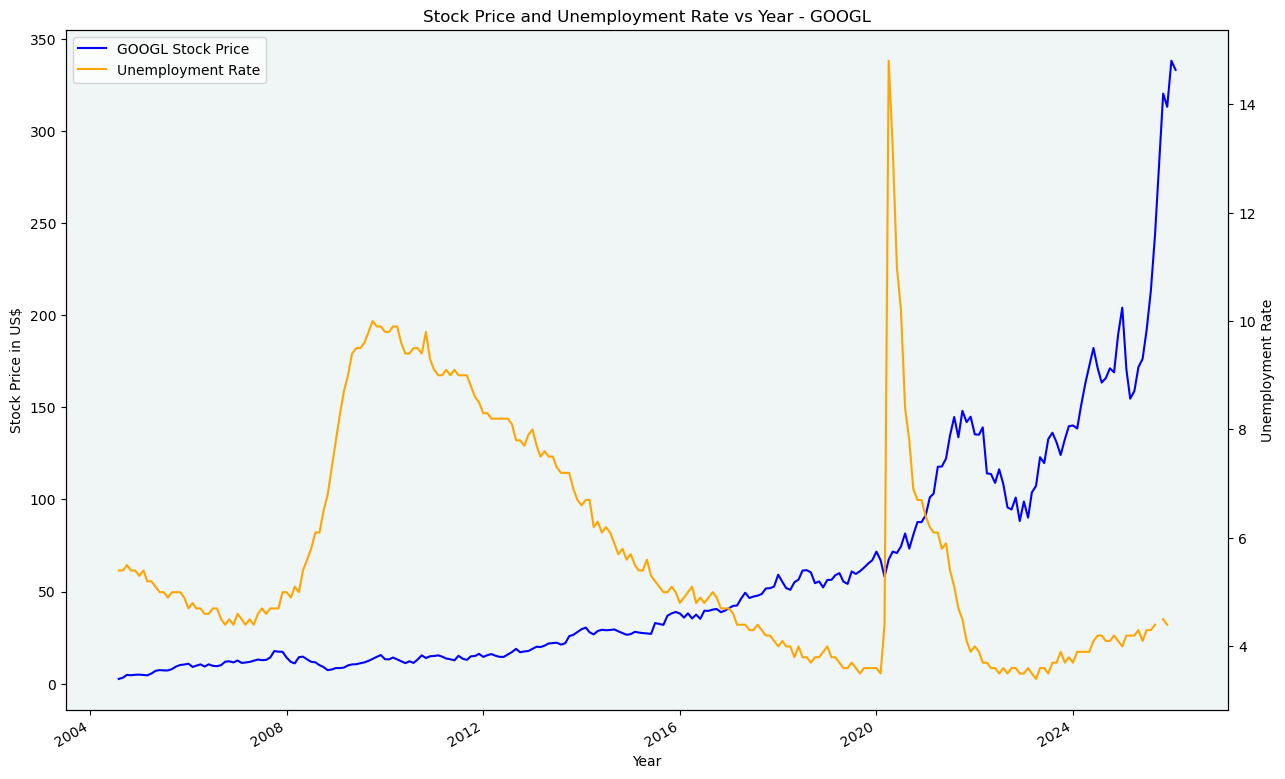

In [137]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_unemploy.smonth, googl_unemploy.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_unemploy.observation_date, googl_unemploy.unemployment_rate, label='y2', color='orange')
ax_right.set_ylabel('Unemployment Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "Unemployment Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Unemployment Rate vs Year - GOOGL")
plt.xlabel("Year")

plt.show()

In [138]:
googl_unemploy_filtered = googl_unemploy[(googl_unemploy['smonth'] > "2015-12-31") & (googl_unemploy['smonth'] < "2026-01-01")]

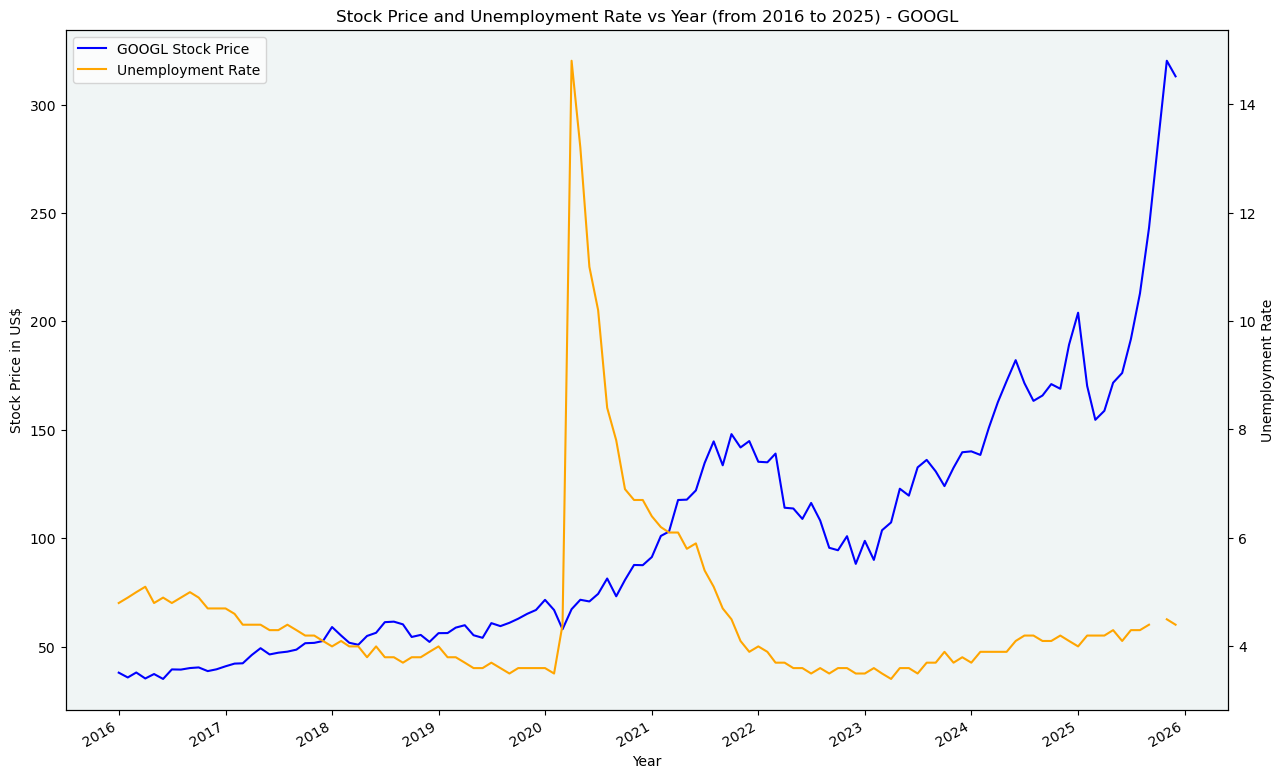

In [141]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_unemploy_filtered.smonth, googl_unemploy_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_unemploy_filtered.observation_date, googl_unemploy_filtered.unemployment_rate, label='y2', color='orange')
ax_right.set_ylabel('Unemployment Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "Unemployment Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Unemployment Rate vs Year (from 2016 to 2025) - GOOGL")
plt.xlabel("Year")

plt.show()

In [142]:
inflation_df = pd.read_csv("inflation.csv")

In [143]:
inflation_df.head

<bound method NDFrame.head of     observation_date  inflation_rate
0         2016-01-01             1.4
1         2016-02-01             1.0
2         2016-03-01             0.9
3         2016-04-01             1.1
4         2016-05-01             1.0
..               ...             ...
115       2025-08-01             2.9
116       2025-09-01             3.0
117       2025-10-01             NaN
118       2025-11-01             2.7
119       2025-12-01             2.7

[120 rows x 2 columns]>

In [144]:
inflation_df.dtypes

observation_date     object
inflation_rate      float64
dtype: object

In [145]:
inflation_df["observation_date"] = pd.to_datetime(inflation_df["observation_date"], errors="coerce")

In [146]:
inflation_df.dtypes

observation_date    datetime64[ns]
inflation_rate             float64
dtype: object

In [147]:
# Merge appl_df and cpi_df
googl_inflation = googl_df
googl_inflation = googl_inflation.merge(inflation_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [148]:
# Check result
googl_inflation[['ticker','smonth','oprice','cprice','svol','observation_date','inflation_rate']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,inflation_rate
137,GOOGL,2016-01-01,38.11,38.07,1039984000,2016-01-01,1.4
138,GOOGL,2016-02-01,38.56,35.86,1352946000,2016-02-01,1.0
139,GOOGL,2016-03-01,36.06,38.15,853314000,2016-03-01,0.9
140,GOOGL,2016-04-01,37.86,35.39,933228000,2016-04-01,1.1
141,GOOGL,2016-05-01,35.60,37.44,682046000,2016-05-01,1.0


In [149]:
print(googl_inflation[googl_inflation["observation_date"].isnull()])

    ticker     smonth  oprice  cprice         svol observation_date  \
0    GOOGL 2004-08-01    2.50    2.56   2672137188              NaT   
1    GOOGL 2004-09-01    2.57    3.24   4249913832              NaT   
2    GOOGL 2004-10-01    3.27    4.77  10272433284              NaT   
3    GOOGL 2004-11-01    4.84    4.55  11092660236              NaT   
4    GOOGL 2004-12-01    4.55    4.82   5807878308              NaT   
..     ...        ...     ...     ...          ...              ...   
134  GOOGL 2015-10-01   31.90   36.87   1005286000              NaT   
135  GOOGL 2015-11-01   36.73   38.14    751482000              NaT   
136  GOOGL 2015-12-01   38.35   38.90    872694000              NaT   
257  GOOGL 2026-01-01  316.90  338.00    621586400              NaT   
258  GOOGL 2026-02-01  336.22  333.04    138623500              NaT   

     inflation_rate  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..             

In [150]:
googl_inflation.dropna(subset=['observation_date','inflation_rate'])

,ticker,smonth,oprice,cprice,svol,observation_date,inflation_rate
137,GOOGL,2016-01-01,38.11,38.07,1039984000,2016-01-01,1.4
138,GOOGL,2016-02-01,38.56,35.86,1352946000,2016-02-01,1.0
139,GOOGL,2016-03-01,36.06,38.15,853314000,2016-03-01,0.9
140,GOOGL,2016-04-01,37.86,35.39,933228000,2016-04-01,1.1
141,GOOGL,2016-05-01,35.60,37.44,682046000,2016-05-01,1.0
...,...,...,...,...,...,...,...
251,GOOGL,2025-07-01,175.74,191.90,860114400,2025-07-01,2.7
252,GOOGL,2025-08-01,189.03,212.91,617570900,2025-08-01,2.9
253,GOOGL,2025-09-01,208.44,243.10,829465500,2025-09-01,3.0
255,GOOGL,2025-11-01,282.18,320.18,855278300,2025-11-01,2.7


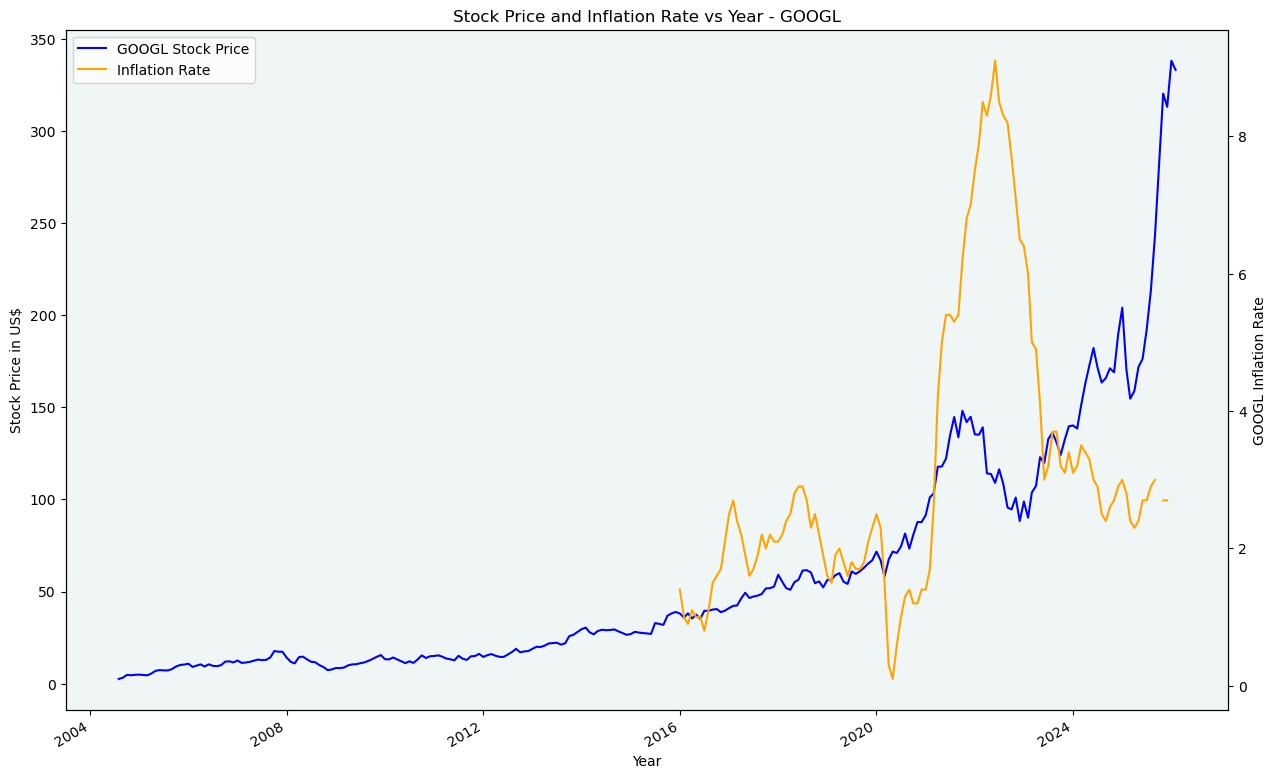

In [152]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_inflation.smonth, googl_inflation.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_inflation.observation_date, googl_inflation.inflation_rate, label='y2', color='orange')
ax_right.set_ylabel('GOOGL Inflation Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "Inflation Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Inflation Rate vs Year - GOOGL")
plt.xlabel("Year")

plt.show()

In [153]:
googl_inflation_filtered = googl_inflation[(googl_inflation['smonth'] > "2015-12-31") & (googl_inflation['smonth'] < "2026-01-01")]

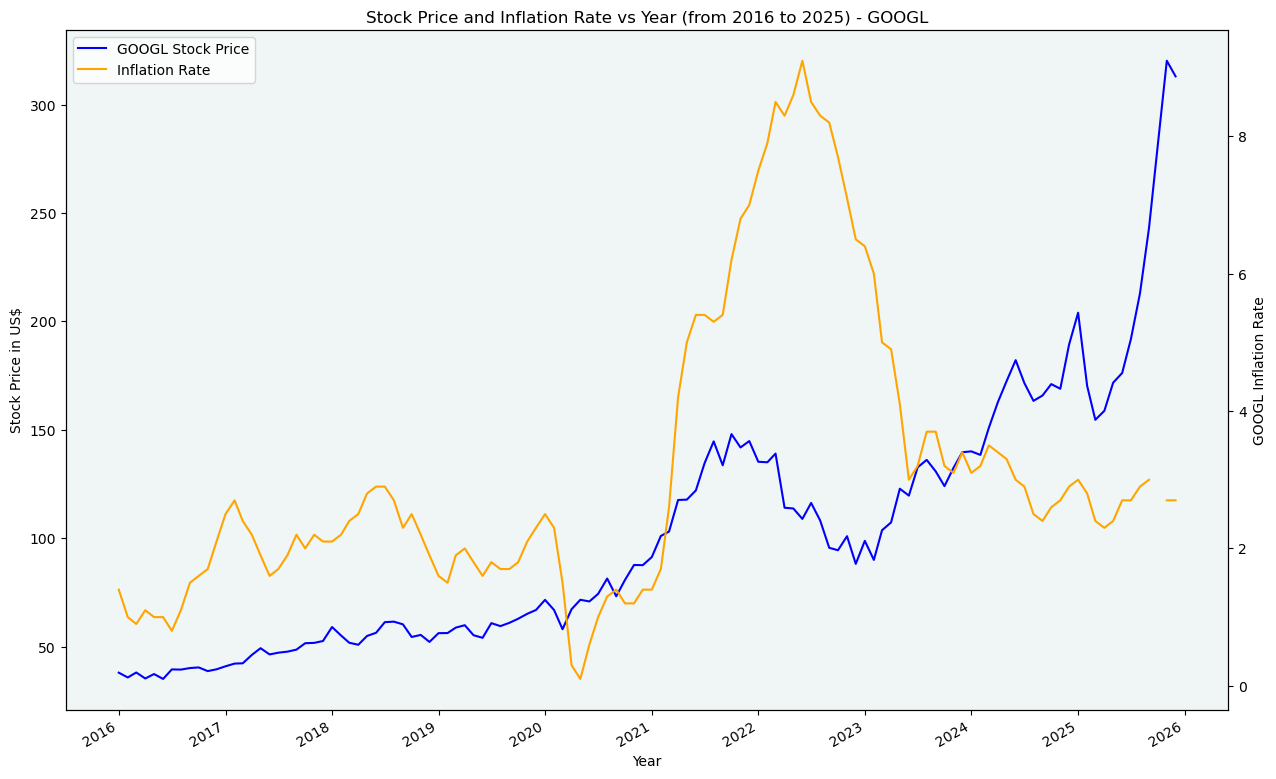

In [155]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_inflation_filtered.smonth, googl_inflation_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_inflation_filtered.observation_date, googl_inflation_filtered.inflation_rate, label='y2', color='orange')
ax_right.set_ylabel('GOOGL Inflation Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "Inflation Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Inflation Rate vs Year (from 2016 to 2025) - GOOGL")
plt.xlabel("Year")

plt.show()

In [156]:
interest_df = pd.read_csv("interest.csv")

In [157]:
interest_df.head

<bound method NDFrame.head of      obser_date  interest
0    1980-01-01     13.82
1    1980-02-01     14.13
2    1980-03-01     17.19
3    1980-04-01     17.61
4    1980-05-01     10.98
..          ...       ...
548  2025-09-01      4.22
549  2025-10-01      4.09
550  2025-11-01      3.88
551  2025-12-01      3.72
552  2026-01-01      3.64

[553 rows x 2 columns]>

In [158]:
interest_df.dtypes

obser_date     object
interest      float64
dtype: object

In [159]:
interest_df["obser_date"] = pd.to_datetime(interest_df["obser_date"], errors="coerce")

In [160]:
interest_df.dtypes

obser_date    datetime64[ns]
interest             float64
dtype: object

In [161]:
# Merge appl_df and cpi_df
googl_interest = googl_df
googl_interest = googl_interest.merge(interest_df, left_on=['smonth'], right_on=['obser_date'], how='left')

In [162]:
# Check result
googl_interest[['ticker','smonth','oprice','cprice','svol','obser_date','interest']].dropna().head()

,ticker,smonth,oprice,cprice,svol,obser_date,interest
0,GOOGL,2004-08-01,2.50,2.56,2672137188,2004-08-01,1.43
1,GOOGL,2004-09-01,2.57,3.24,4249913832,2004-09-01,1.61
2,GOOGL,2004-10-01,3.27,4.77,10272433284,2004-10-01,1.76
3,GOOGL,2004-11-01,4.84,4.55,11092660236,2004-11-01,1.93
4,GOOGL,2004-12-01,4.55,4.82,5807878308,2004-12-01,2.16


In [163]:
print(googl_interest[googl_interest["obser_date"].isnull()])

    ticker     smonth  oprice  cprice       svol obser_date  interest
258  GOOGL 2026-02-01  336.22  333.04  138623500        NaT       NaN


In [164]:
googl_interest.dropna(subset=['obser_date','interest'])

,ticker,smonth,oprice,cprice,svol,obser_date,interest
0,GOOGL,2004-08-01,2.50,2.56,2672137188,2004-08-01,1.43
1,GOOGL,2004-09-01,2.57,3.24,4249913832,2004-09-01,1.61
2,GOOGL,2004-10-01,3.27,4.77,10272433284,2004-10-01,1.76
3,GOOGL,2004-11-01,4.84,4.55,11092660236,2004-11-01,1.93
4,GOOGL,2004-12-01,4.55,4.82,5807878308,2004-12-01,2.16
...,...,...,...,...,...,...,...
253,GOOGL,2025-09-01,208.44,243.10,829465500,2025-09-01,4.22
254,GOOGL,2025-10-01,240.75,281.19,729575900,2025-10-01,4.09
255,GOOGL,2025-11-01,282.18,320.18,855278300,2025-11-01,3.88
256,GOOGL,2025-12-01,317.70,313.00,678208700,2025-12-01,3.72


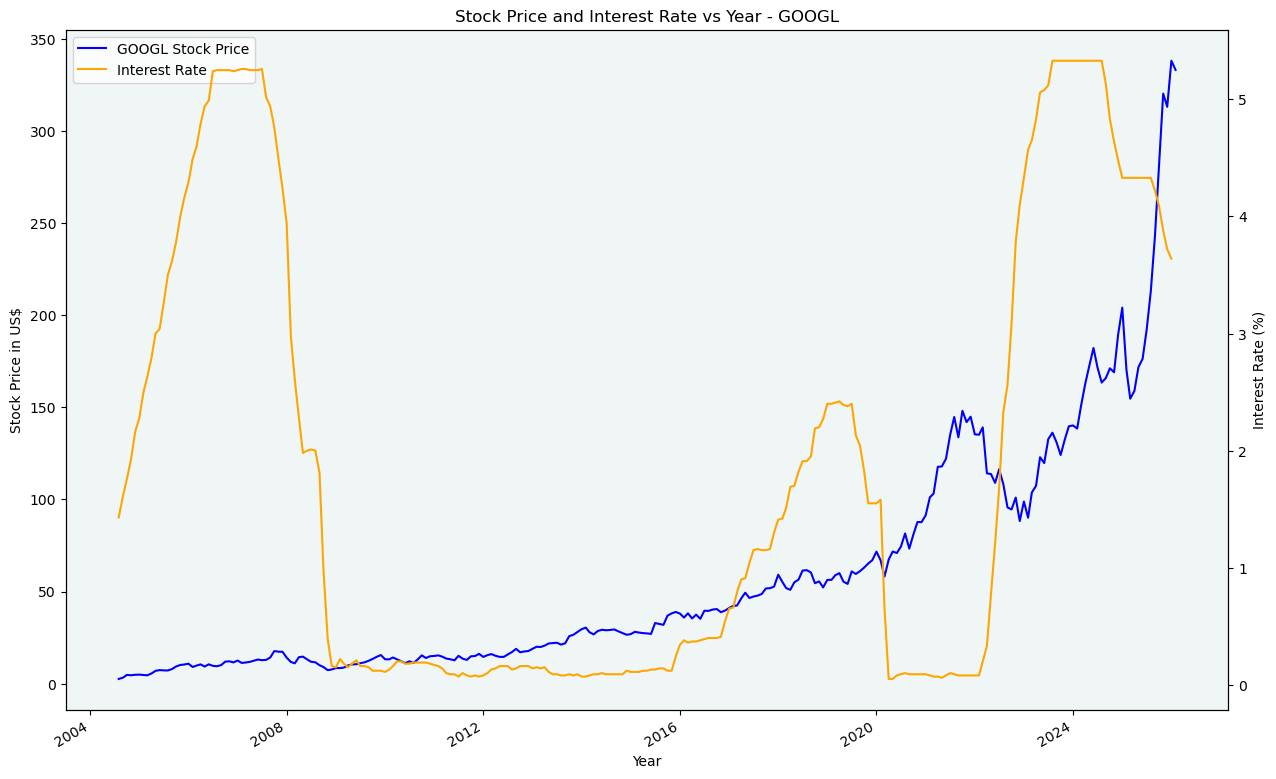

In [166]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_interest.smonth, googl_interest.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_interest.obser_date, googl_interest.interest, label='y2', color='orange')
ax_right.set_ylabel('Interest Rate (%)')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "Interest Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Interest Rate vs Year - GOOGL")
plt.xlabel("Year")

plt.show()

In [167]:
googl_interest_filtered = googl_interest[(googl_interest['smonth'] > "2015-12-31") & (googl_interest['smonth'] < "2026-01-01")]

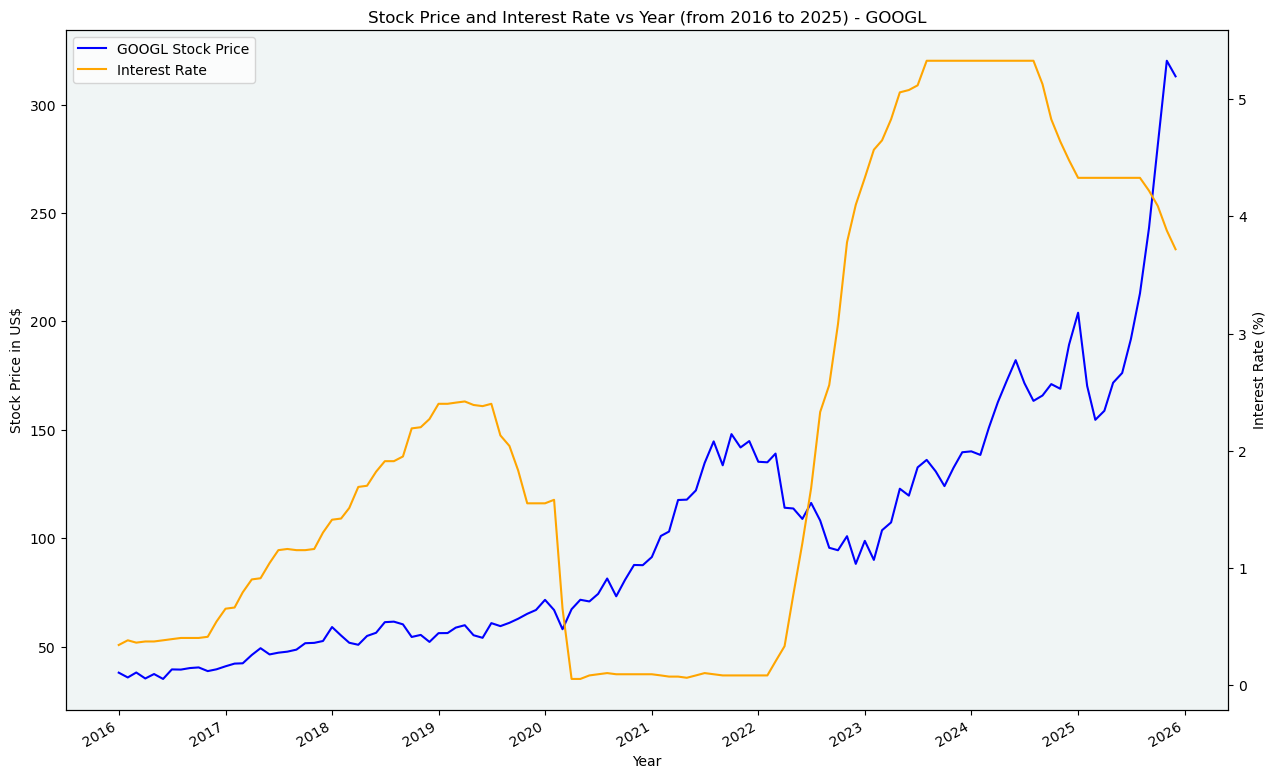

In [169]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_interest_filtered.smonth, googl_interest_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_interest_filtered.obser_date, googl_interest_filtered.interest, label='y2', color='orange')
ax_right.set_ylabel('Interest Rate (%)')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "Interest Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Interest Rate vs Year (from 2016 to 2025) - GOOGL")
plt.xlabel("Year")

plt.show()

In [170]:
gdp_df = pd.read_csv("gdp.csv")

In [171]:
gdp_df.head

<bound method NDFrame.head of    observation_date  gdp_growth
0        2021-10-01         7.0
1        2022-01-01        -1.0
2        2022-04-01         0.6
3        2022-07-01         2.9
4        2022-10-01         2.8
5        2023-01-01         2.9
6        2023-04-01         2.5
7        2023-07-01         4.7
8        2023-10-01         3.4
9        2024-01-01         0.8
10       2024-04-01         3.6
11       2024-07-01         3.3
12       2024-10-01         1.9
13       2025-01-01        -0.6
14       2025-04-01         3.8
15       2025-07-01         4.3>

In [172]:
gdp_df.dtypes

observation_date     object
gdp_growth          float64
dtype: object

In [173]:
gdp_df["observation_date"] = pd.to_datetime(gdp_df["observation_date"], errors="coerce")

In [174]:
gdp_df.dtypes

observation_date    datetime64[ns]
gdp_growth                 float64
dtype: object

In [175]:
# Merge appl_df and cpi_df
googl_gdp = googl_df
googl_gdp = googl_gdp.merge(gdp_df, left_on=['smonth'], right_on=['observation_date'], how='left')


In [176]:
# Check result
googl_gdp[['ticker','smonth','oprice','cprice','svol','observation_date','gdp_growth']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,gdp_growth
206,GOOGL,2021-10-01,134.45,148.05,720758000,2021-10-01,7.0
209,GOOGL,2022-01-01,145.05,135.30,767206000,2022-01-01,-1.0
212,GOOGL,2022-04-01,139.50,114.11,761152000,2022-04-01,0.6
215,GOOGL,2022-07-01,107.93,116.32,789529700,2022-07-01,2.9
218,GOOGL,2022-10-01,96.76,94.51,681488300,2022-10-01,2.8


In [177]:
print(googl_gdp[googl_gdp["observation_date"].isnull()])

    ticker     smonth  oprice  cprice         svol observation_date  \
0    GOOGL 2004-08-01    2.50    2.56   2672137188              NaT   
1    GOOGL 2004-09-01    2.57    3.24   4249913832              NaT   
2    GOOGL 2004-10-01    3.27    4.77  10272433284              NaT   
3    GOOGL 2004-11-01    4.84    4.55  11092660236              NaT   
4    GOOGL 2004-12-01    4.55    4.82   5807878308              NaT   
..     ...        ...     ...     ...          ...              ...   
254  GOOGL 2025-10-01  240.75  281.19    729575900              NaT   
255  GOOGL 2025-11-01  282.18  320.18    855278300              NaT   
256  GOOGL 2025-12-01  317.70  313.00    678208700              NaT   
257  GOOGL 2026-01-01  316.90  338.00    621586400              NaT   
258  GOOGL 2026-02-01  336.22  333.04    138623500              NaT   

     gdp_growth  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
254         NaN  
255

In [178]:
googl_gdp.dropna(subset=['observation_date','gdp_growth'])

,ticker,smonth,oprice,cprice,svol,observation_date,gdp_growth
206,GOOGL,2021-10-01,134.45,148.05,720758000,2021-10-01,7.0
209,GOOGL,2022-01-01,145.05,135.30,767206000,2022-01-01,-1.0
212,GOOGL,2022-04-01,139.50,114.11,761152000,2022-04-01,0.6
215,GOOGL,2022-07-01,107.93,116.32,789529700,2022-07-01,2.9
218,GOOGL,2022-10-01,96.76,94.51,681488300,2022-10-01,2.8
221,GOOGL,2023-01-01,89.59,98.84,672897800,2023-01-01,2.9
224,GOOGL,2023-04-01,102.39,107.34,604106300,2023-04-01,2.5
227,GOOGL,2023-07-01,119.24,132.72,708341900,2023-07-01,4.7
230,GOOGL,2023-10-01,131.21,124.08,680747700,2023-10-01,3.4
233,GOOGL,2024-01-01,138.55,140.10,581871000,2024-01-01,0.8


In [179]:
googl_gdp_modified = googl_gdp.dropna(subset=['observation_date','gdp_growth'])

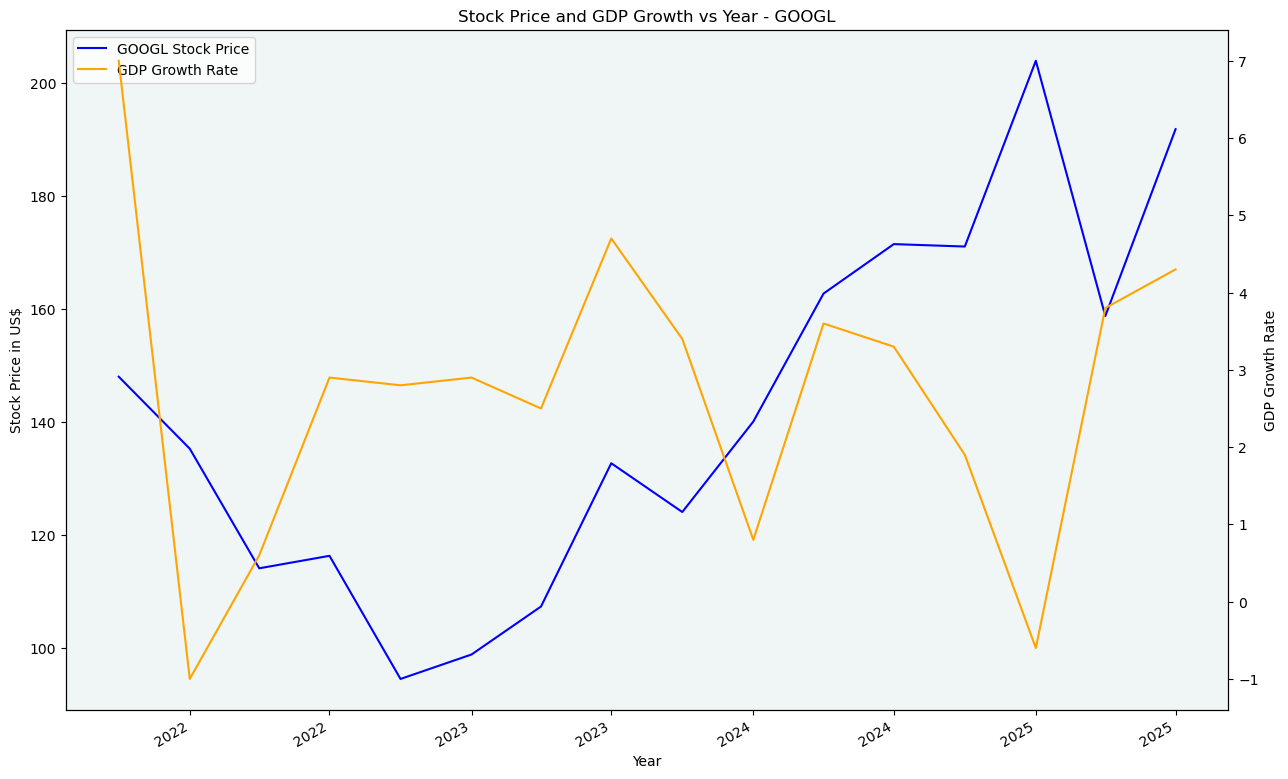

In [181]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F0F5F5')
left_line = ax_left.plot(googl_gdp_modified.smonth, googl_gdp_modified.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(googl_gdp_modified.observation_date, googl_gdp_modified.gdp_growth, label='y2', color='orange')
ax_right.set_ylabel('GDP Growth Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["GOOGL Stock Price", "GDP Growth Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and GDP Growth vs Year - GOOGL")
plt.xlabel("Year")

plt.show()


In [182]:
cpi_df = pd.read_csv("cpi.csv")

In [183]:
cpi_df.head

<bound method NDFrame.head of     observation_date  cpiaucsl
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
943       2025-08-01   323.364
944       2025-09-01   324.368
945       2025-10-01       NaN
946       2025-11-01   325.031
947       2025-12-01   326.030

[948 rows x 2 columns]>

In [184]:
cpi_df.dtypes

observation_date     object
cpiaucsl            float64
dtype: object

In [185]:
cpi_df["observation_date"] = pd.to_datetime(cpi_df["observation_date"], errors="coerce")

In [186]:
cpi_df.dtypes

observation_date    datetime64[ns]
cpiaucsl                   float64
dtype: object

In [187]:
# Merge appl_df and cpi_df
nvda_cpi = nvda_df
nvda_cpi = nvda_cpi.merge(cpi_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [188]:
nvda_cpi[['ticker','smonth','oprice','cprice','svol','observation_date','cpiaucsl']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
0,NVDA,1999-01-01,0.04,0.04,4284288000,1999-01-01,164.7
1,NVDA,1999-02-01,0.04,0.05,3146592000,1999-02-01,164.7
2,NVDA,1999-03-01,0.05,0.04,2014512000,1999-03-01,164.8
3,NVDA,1999-04-01,0.04,0.04,1767024000,1999-04-01,165.9
4,NVDA,1999-05-01,0.04,0.04,2482512000,1999-05-01,166.0


In [189]:
print(nvda_cpi[nvda_cpi["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  cpiaucsl
324   NVDA 2026-01-01  189.84  191.13  3292228600              NaT       NaN
325   NVDA 2026-02-01  187.20  174.19   576283500              NaT       NaN


In [190]:
nvda_cpi.dropna(subset=['observation_date','cpiaucsl'])

,ticker,smonth,oprice,cprice,svol,observation_date,cpiaucsl
0,NVDA,1999-01-01,0.04,0.04,4284288000,1999-01-01,164.700
1,NVDA,1999-02-01,0.04,0.05,3146592000,1999-02-01,164.700
2,NVDA,1999-03-01,0.05,0.04,2014512000,1999-03-01,164.800
3,NVDA,1999-04-01,0.04,0.04,1767024000,1999-04-01,165.900
4,NVDA,1999-05-01,0.04,0.04,2482512000,1999-05-01,166.000
...,...,...,...,...,...,...,...
318,NVDA,2025-07-01,156.29,177.87,3596804400,2025-07-01,322.132
319,NVDA,2025-08-01,174.09,174.18,3608891200,2025-08-01,323.364
320,NVDA,2025-09-01,170.00,186.58,3890495300,2025-09-01,324.368
322,NVDA,2025-11-01,208.08,177.00,4160148300,2025-11-01,325.031


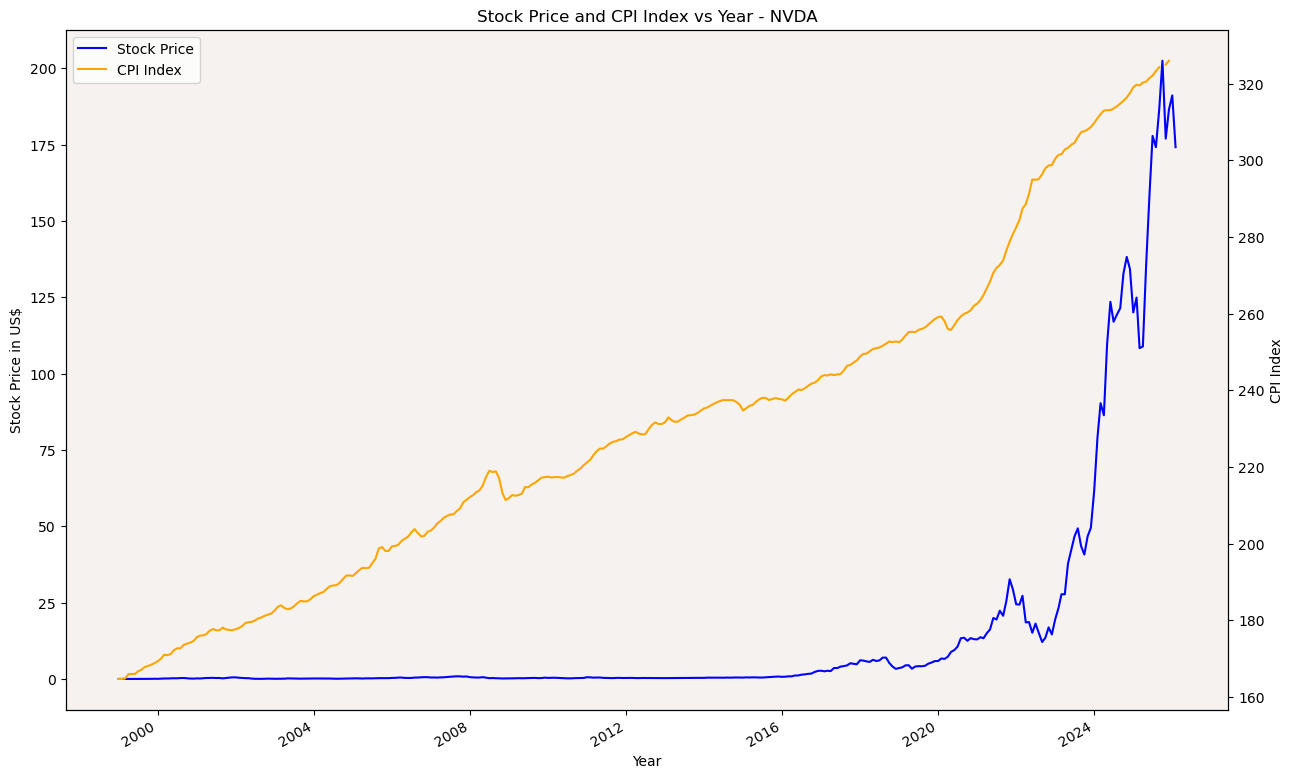

In [212]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_cpi.smonth, nvda_cpi.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_cpi.observation_date, nvda_cpi.cpiaucsl, label='y2', color='orange')
ax_right.set_ylabel('CPI Index')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "CPI Index"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and CPI Index vs Year - NVDA")
plt.xlabel("Year")

plt.show()

In [213]:
nvda_cpi_filtered = nvda_cpi[(nvda_cpi['smonth'] > "2015-12-31") & (nvda_cpi['smonth'] < "2026-01-01")]

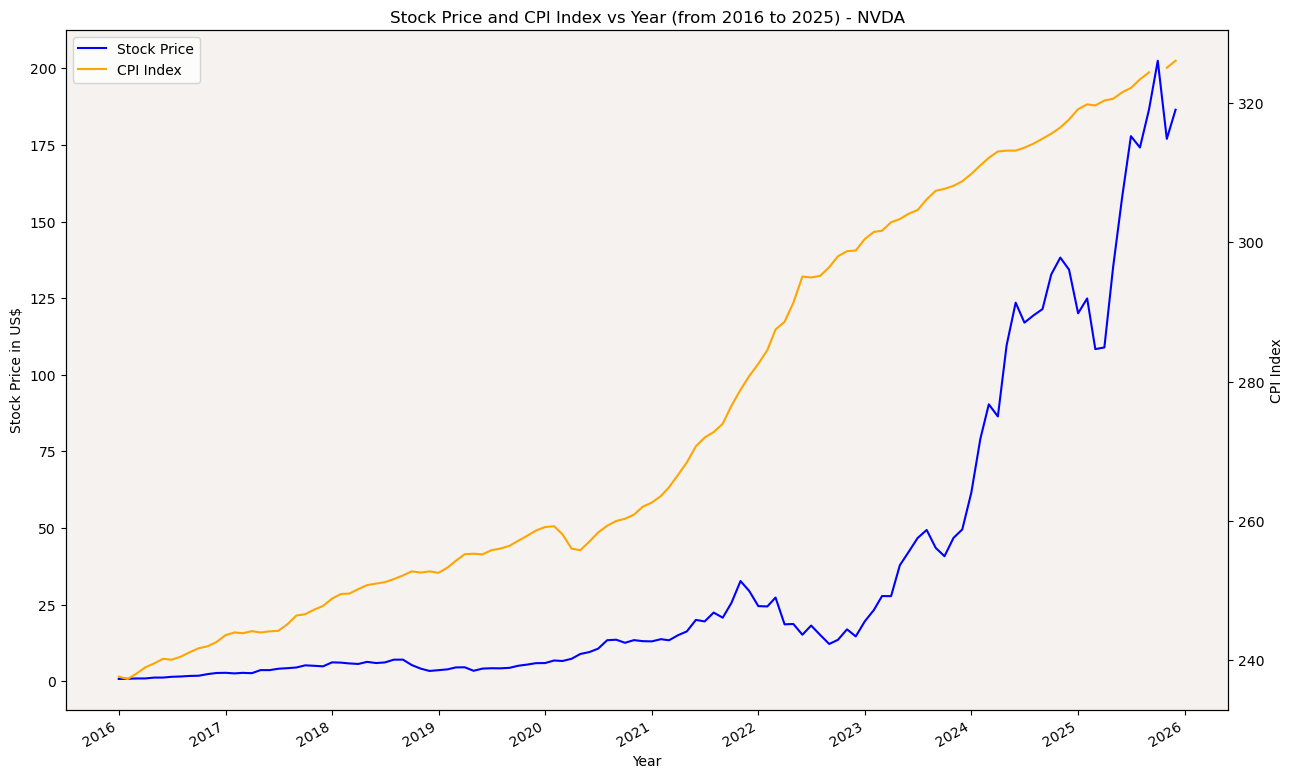

In [214]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_cpi_filtered.smonth, nvda_cpi_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_cpi_filtered.observation_date, nvda_cpi_filtered.cpiaucsl, label='y2', color='orange')
ax_right.set_ylabel('CPI Index')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["Stock Price", "CPI Index"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and CPI Index vs Year (from 2016 to 2025) - NVDA")
plt.xlabel("Year")

plt.show()

In [215]:
unemploy_df = pd.read_csv("unemployment.csv")

In [216]:
unemploy_df.head

<bound method NDFrame.head of     observation_date  unemployment_rate
0         1948-01-01                3.4
1         1948-02-01                3.8
2         1948-03-01                4.0
3         1948-04-01                3.9
4         1948-05-01                3.5
..               ...                ...
931       2025-08-01                4.3
932       2025-09-01                4.4
933       2025-10-01                NaN
934       2025-11-01                4.5
935       2025-12-01                4.4

[936 rows x 2 columns]>

In [217]:
unemploy_df.dtypes

observation_date      object
unemployment_rate    float64
dtype: object

In [218]:
unemploy_df["observation_date"] = pd.to_datetime(unemploy_df["observation_date"], errors="coerce")

In [219]:
unemploy_df.dtypes

observation_date     datetime64[ns]
unemployment_rate           float64
dtype: object

In [220]:
# Merge appl_df and cpi_df
nvda_unemploy = nvda_df
nvda_unemploy = nvda_unemploy.merge(unemploy_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [221]:
# Check result
nvda_unemploy[['ticker','smonth','oprice','cprice','svol','observation_date','unemployment_rate']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,unemployment_rate
0,NVDA,1999-01-01,0.04,0.04,4284288000,1999-01-01,4.3
1,NVDA,1999-02-01,0.04,0.05,3146592000,1999-02-01,4.4
2,NVDA,1999-03-01,0.05,0.04,2014512000,1999-03-01,4.2
3,NVDA,1999-04-01,0.04,0.04,1767024000,1999-04-01,4.3
4,NVDA,1999-05-01,0.04,0.04,2482512000,1999-05-01,4.2


In [222]:
print(nvda_unemploy[nvda_unemploy["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  \
324   NVDA 2026-01-01  189.84  191.13  3292228600              NaT   
325   NVDA 2026-02-01  187.20  174.19   576283500              NaT   

     unemployment_rate  
324                NaN  
325                NaN  


In [223]:
nvda_unemploy.dropna(subset=['observation_date','unemployment_rate'])

,ticker,smonth,oprice,cprice,svol,observation_date,unemployment_rate
0,NVDA,1999-01-01,0.04,0.04,4284288000,1999-01-01,4.3
1,NVDA,1999-02-01,0.04,0.05,3146592000,1999-02-01,4.4
2,NVDA,1999-03-01,0.05,0.04,2014512000,1999-03-01,4.2
3,NVDA,1999-04-01,0.04,0.04,1767024000,1999-04-01,4.3
4,NVDA,1999-05-01,0.04,0.04,2482512000,1999-05-01,4.2
...,...,...,...,...,...,...,...
318,NVDA,2025-07-01,156.29,177.87,3596804400,2025-07-01,4.3
319,NVDA,2025-08-01,174.09,174.18,3608891200,2025-08-01,4.3
320,NVDA,2025-09-01,170.00,186.58,3890495300,2025-09-01,4.4
322,NVDA,2025-11-01,208.08,177.00,4160148300,2025-11-01,4.5


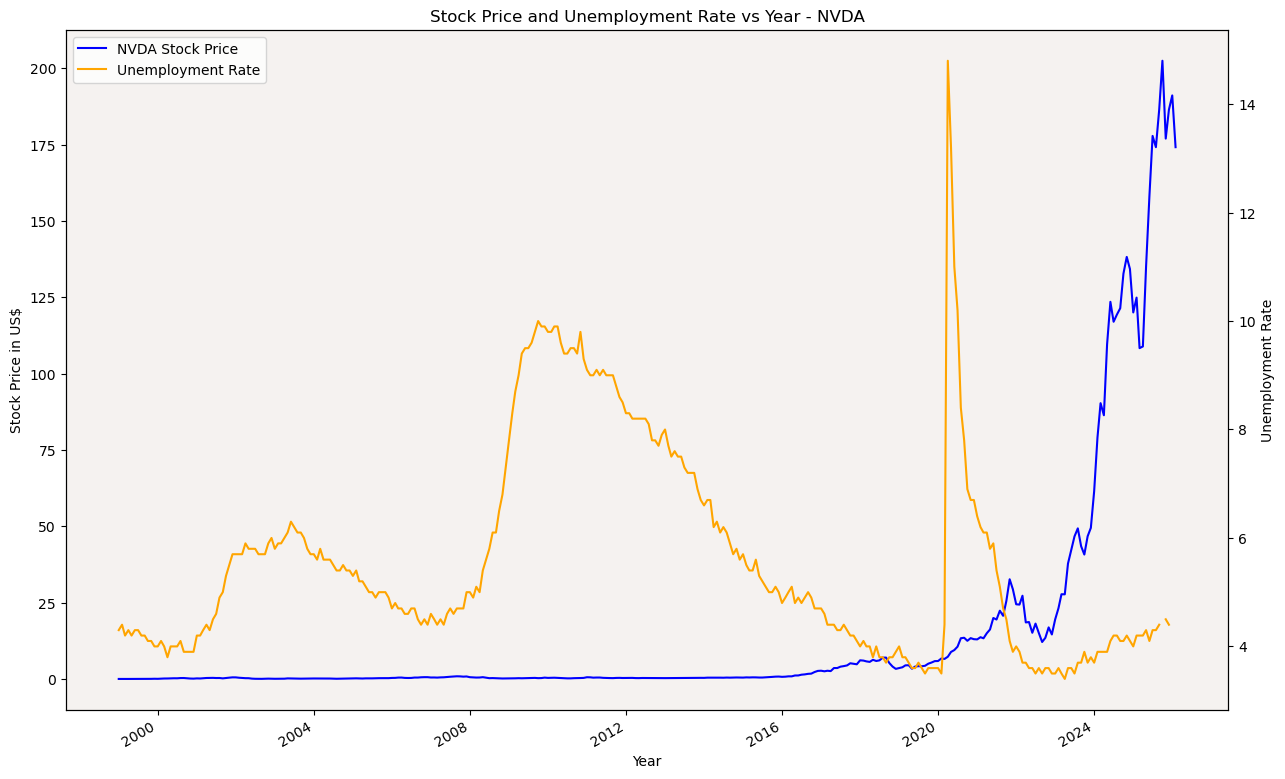

In [224]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_unemploy.smonth, nvda_unemploy.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_unemploy.observation_date, nvda_unemploy.unemployment_rate, label='y2', color='orange')
ax_right.set_ylabel('Unemployment Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "Unemployment Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Unemployment Rate vs Year - NVDA")
plt.xlabel("Year")

plt.show()

In [225]:
nvda_unemploy_filtered = nvda_unemploy[(nvda_unemploy['smonth'] > "2015-12-31") & (nvda_unemploy['smonth'] < "2026-01-01")]

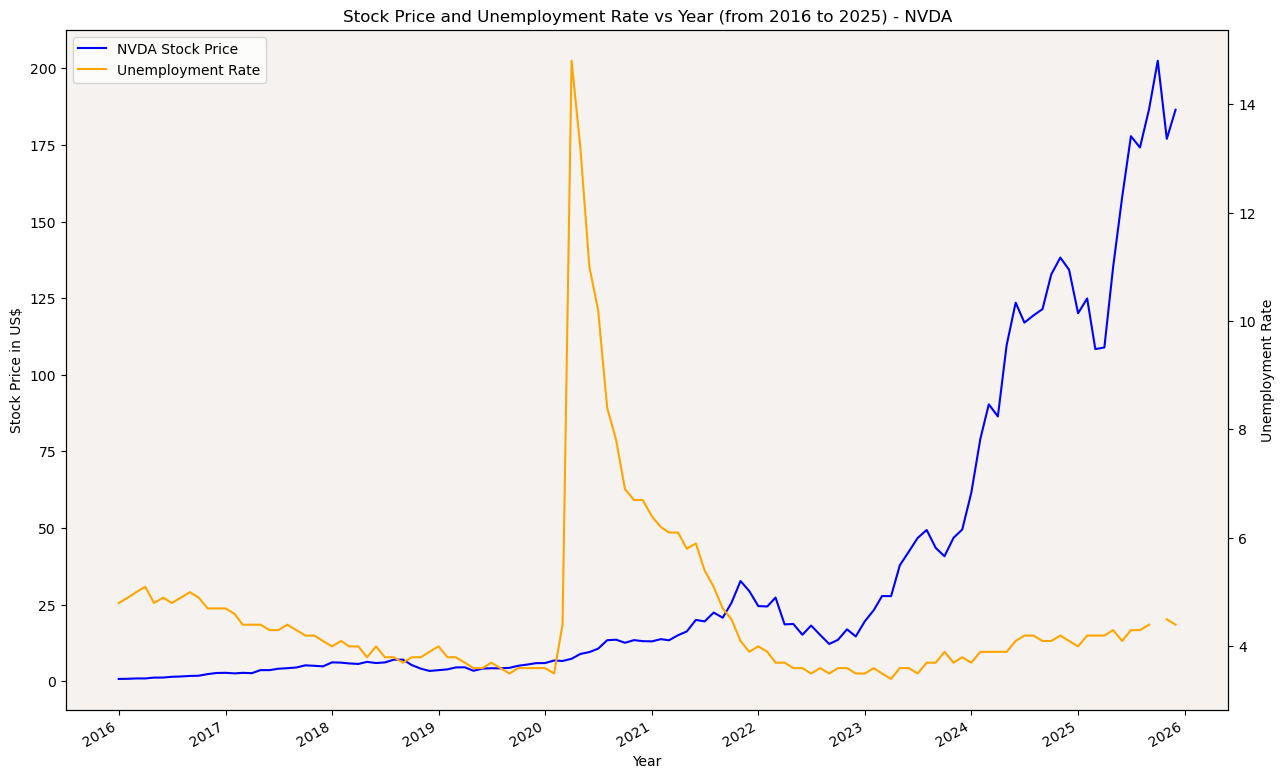

In [227]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_unemploy_filtered.smonth, nvda_unemploy_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_unemploy_filtered.observation_date, nvda_unemploy_filtered.unemployment_rate, label='y2', color='orange')
ax_right.set_ylabel('Unemployment Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "Unemployment Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Unemployment Rate vs Year (from 2016 to 2025) - NVDA")
plt.xlabel("Year")

plt.show()

In [228]:
inflation_df = pd.read_csv("inflation.csv")

In [229]:
inflation_df.head

<bound method NDFrame.head of     observation_date  inflation_rate
0         2016-01-01             1.4
1         2016-02-01             1.0
2         2016-03-01             0.9
3         2016-04-01             1.1
4         2016-05-01             1.0
..               ...             ...
115       2025-08-01             2.9
116       2025-09-01             3.0
117       2025-10-01             NaN
118       2025-11-01             2.7
119       2025-12-01             2.7

[120 rows x 2 columns]>

In [230]:
inflation_df.dtypes

observation_date     object
inflation_rate      float64
dtype: object

In [231]:
inflation_df["observation_date"] = pd.to_datetime(inflation_df["observation_date"], errors="coerce")

In [232]:
inflation_df.dtypes

observation_date    datetime64[ns]
inflation_rate             float64
dtype: object

In [233]:
# Merge appl_df and cpi_df
nvda_inflation = nvda_df
nvda_inflation = nvda_inflation.merge(inflation_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [234]:
# Check result
nvda_inflation[['ticker','smonth','oprice','cprice','svol','observation_date','inflation_rate']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,inflation_rate
204,NVDA,2016-01-01,0.81,0.73,8138980000,2016-01-01,1.4
205,NVDA,2016-02-01,0.73,0.78,9000048000,2016-02-01,1.0
206,NVDA,2016-03-01,0.79,0.89,6577904000,2016-03-01,0.9
207,NVDA,2016-04-01,0.89,0.89,6734252000,2016-04-01,1.1
208,NVDA,2016-05-01,0.90,1.17,10367836000,2016-05-01,1.0


In [235]:
print(nvda_inflation[nvda_inflation["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  \
0     NVDA 1999-01-01    0.04    0.04  4284288000              NaT   
1     NVDA 1999-02-01    0.04    0.05  3146592000              NaT   
2     NVDA 1999-03-01    0.05    0.04  2014512000              NaT   
3     NVDA 1999-04-01    0.04    0.04  1767024000              NaT   
4     NVDA 1999-05-01    0.04    0.04  2482512000              NaT   
..     ...        ...     ...     ...         ...              ...   
201   NVDA 2015-10-01    0.62    0.71  8052316000              NaT   
202   NVDA 2015-11-01    0.71    0.79  7344816000              NaT   
203   NVDA 2015-12-01    0.80    0.82  5627172000              NaT   
324   NVDA 2026-01-01  189.84  191.13  3292228600              NaT   
325   NVDA 2026-02-01  187.20  174.19   576283500              NaT   

     inflation_rate  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
201  

In [236]:
nvda_inflation.dropna(subset=['observation_date','inflation_rate'])

,ticker,smonth,oprice,cprice,svol,observation_date,inflation_rate
204,NVDA,2016-01-01,0.81,0.73,8138980000,2016-01-01,1.4
205,NVDA,2016-02-01,0.73,0.78,9000048000,2016-02-01,1.0
206,NVDA,2016-03-01,0.79,0.89,6577904000,2016-03-01,0.9
207,NVDA,2016-04-01,0.89,0.89,6734252000,2016-04-01,1.1
208,NVDA,2016-05-01,0.90,1.17,10367836000,2016-05-01,1.0
...,...,...,...,...,...,...,...
318,NVDA,2025-07-01,156.29,177.87,3596804400,2025-07-01,2.7
319,NVDA,2025-08-01,174.09,174.18,3608891200,2025-08-01,2.9
320,NVDA,2025-09-01,170.00,186.58,3890495300,2025-09-01,3.0
322,NVDA,2025-11-01,208.08,177.00,4160148300,2025-11-01,2.7


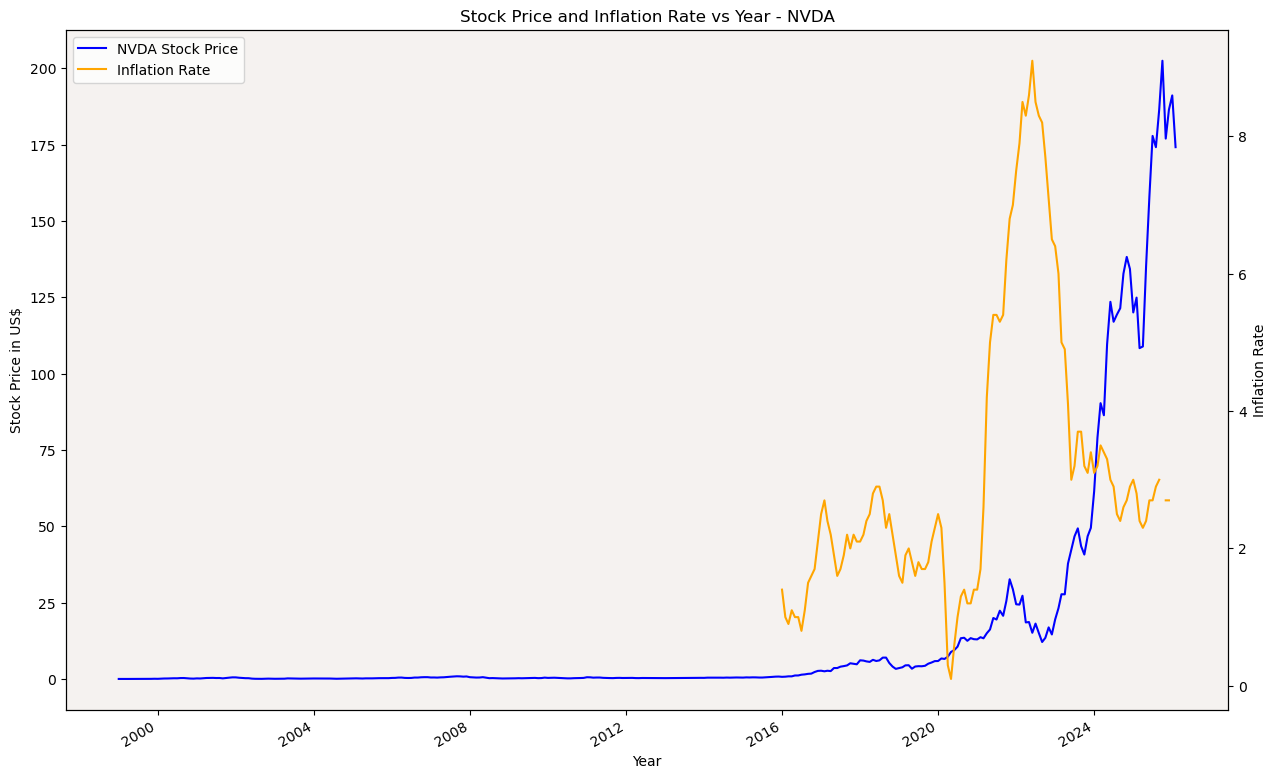

In [238]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_inflation.smonth, nvda_inflation.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_inflation.observation_date, nvda_inflation.inflation_rate, label='y2', color='orange')
ax_right.set_ylabel('Inflation Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "Inflation Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Inflation Rate vs Year - NVDA")
plt.xlabel("Year")

plt.show()

In [239]:
nvda_inflation_filtered = nvda_inflation[(nvda_inflation['smonth'] > "2015-12-31") & (nvda_inflation['smonth'] < "2026-01-01")]

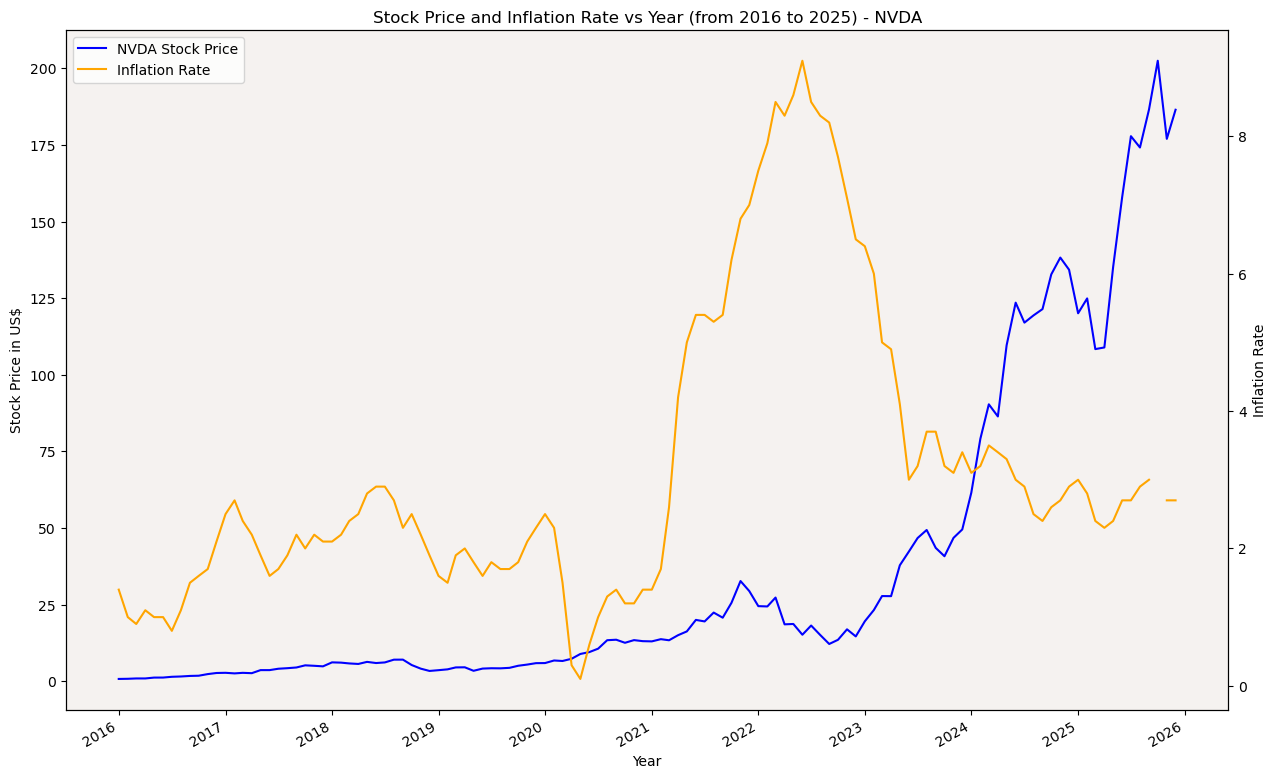

In [241]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_inflation_filtered.smonth, nvda_inflation_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_inflation_filtered.observation_date, nvda_inflation_filtered.inflation_rate, label='y2', color='orange')
ax_right.set_ylabel('Inflation Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "Inflation Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Inflation Rate vs Year (from 2016 to 2025) - NVDA")
plt.xlabel("Year")

plt.show()

In [242]:
interest_df = pd.read_csv("interest.csv")

In [243]:
interest_df.head

<bound method NDFrame.head of      obser_date  interest
0    1980-01-01     13.82
1    1980-02-01     14.13
2    1980-03-01     17.19
3    1980-04-01     17.61
4    1980-05-01     10.98
..          ...       ...
548  2025-09-01      4.22
549  2025-10-01      4.09
550  2025-11-01      3.88
551  2025-12-01      3.72
552  2026-01-01      3.64

[553 rows x 2 columns]>

In [244]:
interest_df.dtypes

obser_date     object
interest      float64
dtype: object

In [245]:
interest_df["obser_date"] = pd.to_datetime(interest_df["obser_date"], errors="coerce")

In [246]:
interest_df.dtypes

obser_date    datetime64[ns]
interest             float64
dtype: object

In [247]:
# Merge appl_df and cpi_df
nvda_interest = nvda_df
nvda_interest = nvda_interest.merge(interest_df, left_on=['smonth'], right_on=['obser_date'], how='left')

In [248]:
# Check result
nvda_interest[['ticker','smonth','oprice','cprice','svol','obser_date','interest']].dropna().head()


,ticker,smonth,oprice,cprice,svol,obser_date,interest
0,NVDA,1999-01-01,0.04,0.04,4284288000,1999-01-01,4.63
1,NVDA,1999-02-01,0.04,0.05,3146592000,1999-02-01,4.76
2,NVDA,1999-03-01,0.05,0.04,2014512000,1999-03-01,4.81
3,NVDA,1999-04-01,0.04,0.04,1767024000,1999-04-01,4.74
4,NVDA,1999-05-01,0.04,0.04,2482512000,1999-05-01,4.74


In [249]:
print(nvda_interest[nvda_interest["obser_date"].isnull()])

    ticker     smonth  oprice  cprice       svol obser_date  interest
325   NVDA 2026-02-01   187.2  174.19  576283500        NaT       NaN


In [250]:
nvda_interest.dropna(subset=['obser_date','interest'])

,ticker,smonth,oprice,cprice,svol,obser_date,interest
0,NVDA,1999-01-01,0.04,0.04,4284288000,1999-01-01,4.63
1,NVDA,1999-02-01,0.04,0.05,3146592000,1999-02-01,4.76
2,NVDA,1999-03-01,0.05,0.04,2014512000,1999-03-01,4.81
3,NVDA,1999-04-01,0.04,0.04,1767024000,1999-04-01,4.74
4,NVDA,1999-05-01,0.04,0.04,2482512000,1999-05-01,4.74
...,...,...,...,...,...,...,...
320,NVDA,2025-09-01,170.00,186.58,3890495300,2025-09-01,4.22
321,NVDA,2025-10-01,185.24,202.49,4031017400,2025-10-01,4.09
322,NVDA,2025-11-01,208.08,177.00,4160148300,2025-11-01,3.88
323,NVDA,2025-12-01,174.76,186.50,3629693700,2025-12-01,3.72


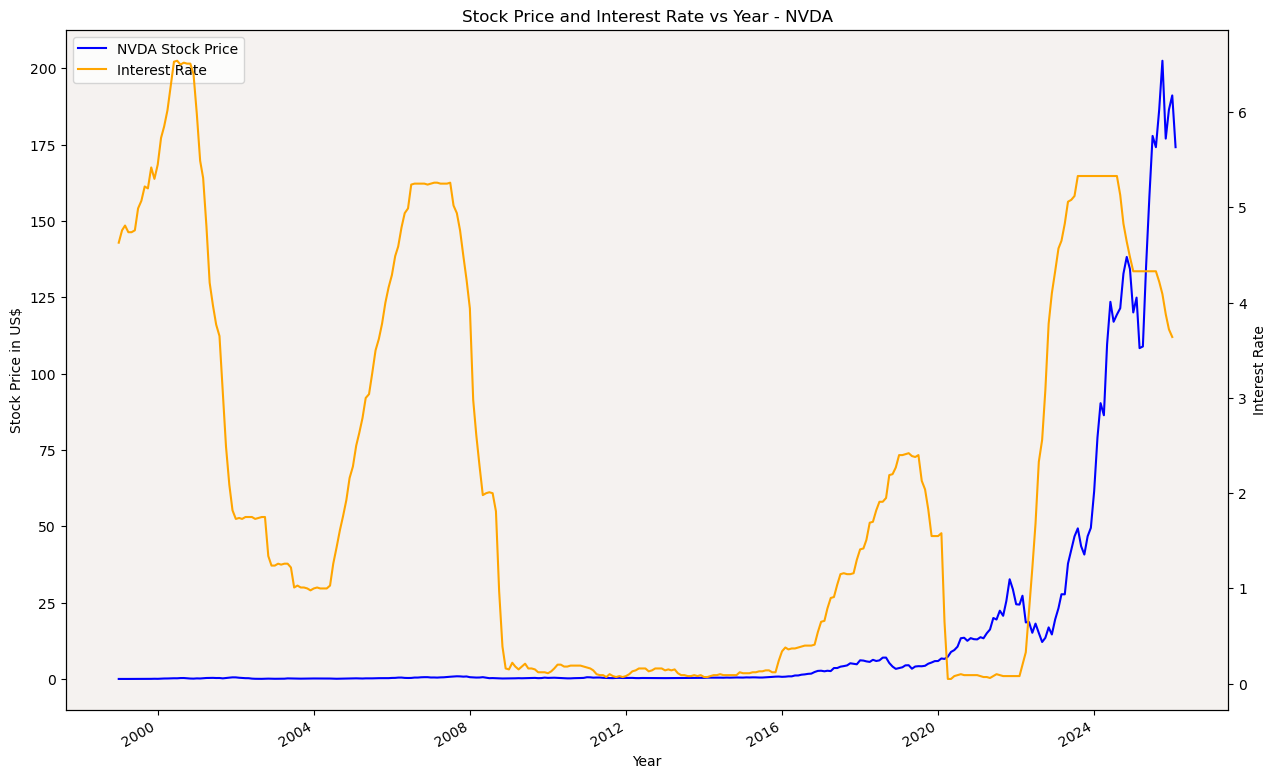

In [252]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_interest.smonth, nvda_interest.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_interest.obser_date, nvda_interest.interest, label='y2', color='orange')
ax_right.set_ylabel('Interest Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "Interest Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Interest Rate vs Year - NVDA")
plt.xlabel("Year")

plt.show()

In [253]:
nvda_interest_filtered = nvda_interest[(nvda_interest['smonth'] > "2015-12-31") & (nvda_interest['smonth'] < "2026-01-01")]

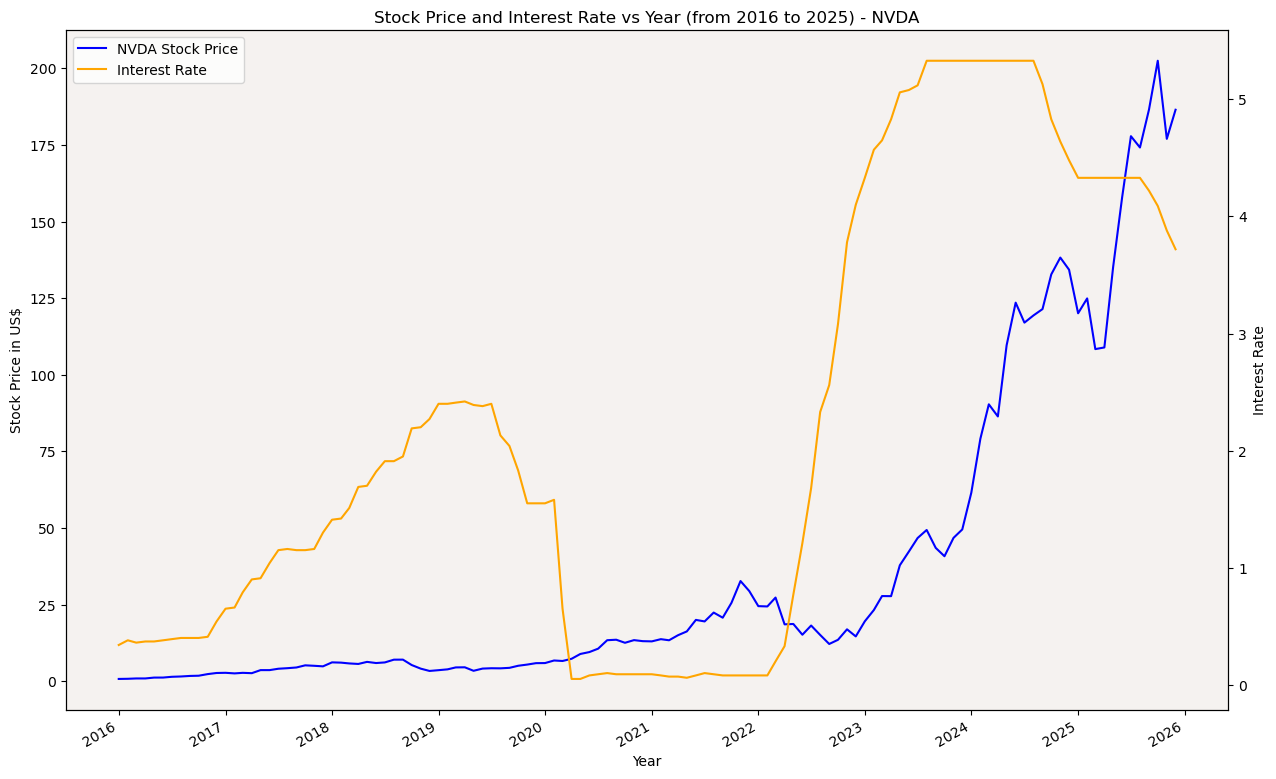

In [255]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_interest_filtered.smonth, nvda_interest_filtered.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_interest_filtered.obser_date, nvda_interest_filtered.interest, label='y2', color='orange')
ax_right.set_ylabel('Interest Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "Interest Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and Interest Rate vs Year (from 2016 to 2025) - NVDA")
plt.xlabel("Year")

plt.show()

In [256]:
gdp_df = pd.read_csv("gdp.csv")

In [257]:
gdp_df.head

<bound method NDFrame.head of    observation_date  gdp_growth
0        2021-10-01         7.0
1        2022-01-01        -1.0
2        2022-04-01         0.6
3        2022-07-01         2.9
4        2022-10-01         2.8
5        2023-01-01         2.9
6        2023-04-01         2.5
7        2023-07-01         4.7
8        2023-10-01         3.4
9        2024-01-01         0.8
10       2024-04-01         3.6
11       2024-07-01         3.3
12       2024-10-01         1.9
13       2025-01-01        -0.6
14       2025-04-01         3.8
15       2025-07-01         4.3>

In [258]:
gdp_df.dtypes

observation_date     object
gdp_growth          float64
dtype: object

In [259]:
gdp_df["observation_date"] = pd.to_datetime(gdp_df["observation_date"], errors="coerce")

In [260]:
gdp_df.dtypes

observation_date    datetime64[ns]
gdp_growth                 float64
dtype: object

In [261]:
# Merge appl_df and cpi_df
nvda_gdp = nvda_df
nvda_gdp = nvda_gdp.merge(gdp_df, left_on=['smonth'], right_on=['observation_date'], how='left')

In [262]:
# Check result
nvda_gdp[['ticker','smonth','oprice','cprice','svol','observation_date','gdp_growth']].dropna().head()

,ticker,smonth,oprice,cprice,svol,observation_date,gdp_growth
273,NVDA,2021-10-01,20.75,25.57,4971078000,2021-10-01,7.0
276,NVDA,2022-01-01,29.82,24.49,10682164000,2022-01-01,-1.0
279,NVDA,2022-04-01,27.38,18.55,11114390000,2022-04-01,0.6
282,NVDA,2022-07-01,14.90,18.16,10564476000,2022-07-01,2.9
285,NVDA,2022-10-01,12.35,13.50,12549277000,2022-10-01,2.8


In [263]:
print(nvda_gdp[nvda_gdp["observation_date"].isnull()])

    ticker     smonth  oprice  cprice        svol observation_date  gdp_growth
0     NVDA 1999-01-01    0.04    0.04  4284288000              NaT         NaN
1     NVDA 1999-02-01    0.04    0.05  3146592000              NaT         NaN
2     NVDA 1999-03-01    0.05    0.04  2014512000              NaT         NaN
3     NVDA 1999-04-01    0.04    0.04  1767024000              NaT         NaN
4     NVDA 1999-05-01    0.04    0.04  2482512000              NaT         NaN
..     ...        ...     ...     ...         ...              ...         ...
321   NVDA 2025-10-01  185.24  202.49  4031017400              NaT         NaN
322   NVDA 2025-11-01  208.08  177.00  4160148300              NaT         NaN
323   NVDA 2025-12-01  174.76  186.50  3629693700              NaT         NaN
324   NVDA 2026-01-01  189.84  191.13  3292228600              NaT         NaN
325   NVDA 2026-02-01  187.20  174.19   576283500              NaT         NaN

[310 rows x 7 columns]


In [264]:
nvda_gdp.dropna(subset=['observation_date','gdp_growth'])

,ticker,smonth,oprice,cprice,svol,observation_date,gdp_growth
273,NVDA,2021-10-01,20.75,25.57,4971078000,2021-10-01,7.0
276,NVDA,2022-01-01,29.82,24.49,10682164000,2022-01-01,-1.0
279,NVDA,2022-04-01,27.38,18.55,11114390000,2022-04-01,0.6
282,NVDA,2022-07-01,14.90,18.16,10564476000,2022-07-01,2.9
285,NVDA,2022-10-01,12.35,13.50,12549277000,2022-10-01,2.8
288,NVDA,2023-01-01,14.85,19.54,9454960000,2023-01-01,2.9
291,NVDA,2023-04-01,27.51,27.75,7436450000,2023-04-01,2.5
294,NVDA,2023-07-01,42.52,46.73,8706845000,2023-07-01,4.7
297,NVDA,2023-10-01,44.03,40.78,10141101000,2023-10-01,3.4
300,NVDA,2024-01-01,49.24,61.53,9706237000,2024-01-01,0.8


In [265]:
nvda_gdp_modified = nvda_gdp.dropna(subset=['observation_date','gdp_growth'])

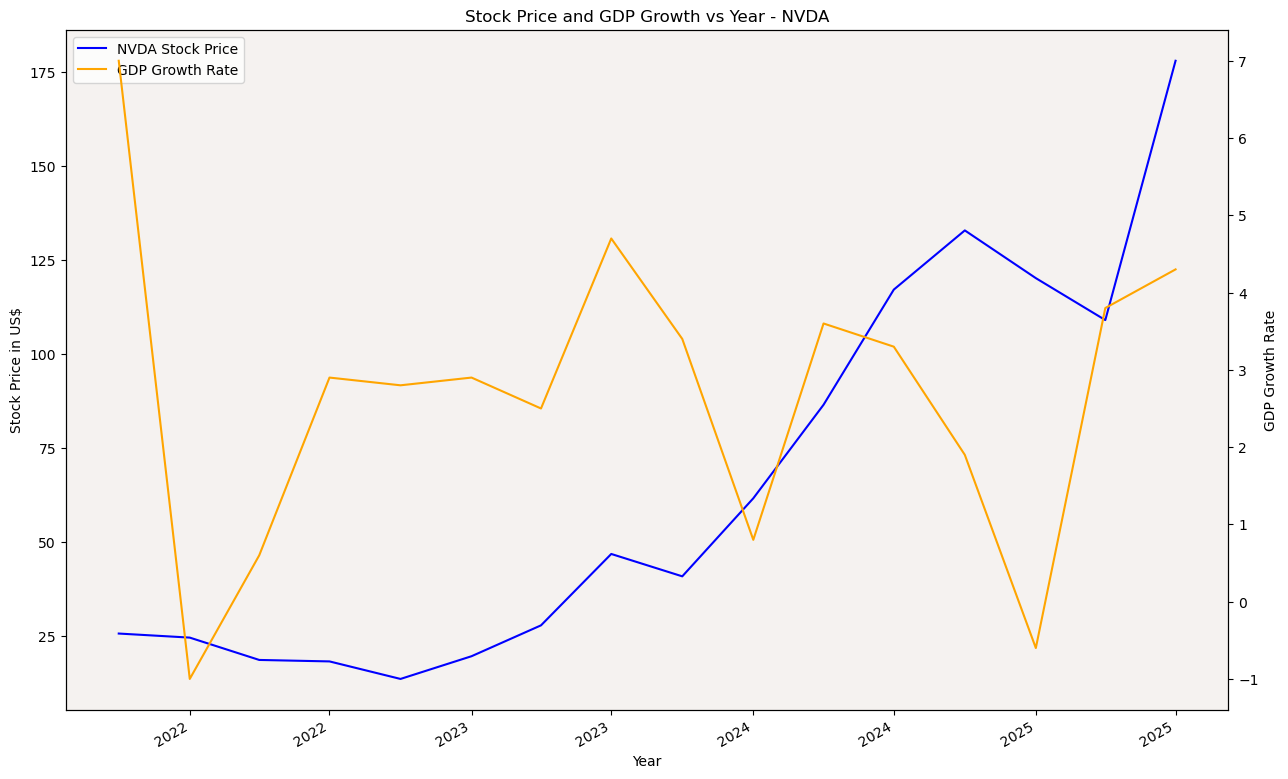

In [267]:
# Import the necessary libraries.
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax_left = plt.subplots(figsize=(15, 10))
#fig, ax_left = plt.subplots()
ax_left.set_facecolor('#F5F2F0')
left_line = ax_left.plot(nvda_gdp_modified.smonth, nvda_gdp_modified.cprice, label='y1', color='blue')
ax_left.set_ylabel('Stock Price in US$')

ax_right = ax_left.twinx()
right_line = ax_right.plot(nvda_gdp_modified.observation_date, nvda_gdp_modified.gdp_growth, label='y2', color='orange')
ax_right.set_ylabel('GDP Growth Rate')

ax_left.set_xlabel('Year')
all_lines = left_line + right_line
ax_left.legend(all_lines, ["NVDA Stock Price", "GDP Growth Rate"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.gcf().autofmt_xdate()

plt.title("Stock Price and GDP Growth vs Year - NVDA")
plt.xlabel("Year")

plt.show()
